<div style="
    border: 3px solid #0056b3;        /* Viền xanh đậm */
    border-radius: 10px;              /* Bo tròn góc */
    padding: 20px;
    margin: 20px 0;
    text-align: center;               /* Căn giữa toàn bộ nội dung */
    background-color: #e6f0ff;        /* Nền xanh nhạt */
    box-shadow: 5px 5px 10px #aaaaaa; /* Đổ bóng */
">
    <h1 style="color: #0056b3; margin-bottom: 5px;">
        ĐỒ ÁN CUỐI KÌ
    </h1>
    <h3 style="color: #333333; margin-top: 5px;">
        LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU
    </h3>
</div>

<div style="
    margin-top: 20px;
    margin-bottom: 10px;
    padding-bottom: 5px;
    border-bottom: 4px solid #007bff; /* Thanh ngang màu xanh */
">
    <h2 style="color: #007bff; margin: 0; padding: 0;">
        ĐẶT CÁC BÀI TOÁN TRÊN TẬP DỮ LIỆU VÀ TRẢ LỜI
    </h2>
</div>

<div style="
    /* Tối ưu hóa hiển thị trên mọi kích thước màn hình */
    box-sizing: border-box; 
    max-width: 100%; /* Đảm bảo không vượt quá chiều rộng của Notebook */
    overflow-x: hidden; /* Ngăn thanh cuộn ngang xuất hiện */
    
    /* Định dạng thẩm mỹ */
    border: 3px solid #ff9900;
    border-radius: 15px;
    padding: 20px;
    margin: 25px 0;
    background-color: #fffaf0;
    box-shadow: 4px 4px 10px rgba(0, 0, 0, 0.15);
">
    <p style="text-align: justify; line-height: 1.5; margin: 0;">
        Dựa trên các kết quả phân tích dữ liệu ban đầu, mục này tập trung **xây dựng các câu hỏi nghiên cứu** nhằm làm rõ những xu hướng hành vi và điểm bất thường đã quan sát được, đặc biệt là sự chênh lệch giữa lượng truy cập và tỷ lệ chuyển đổi. Các câu hỏi hướng đến việc phân tích chất lượng nguồn truy cập, hành vi “xem nhưng không mua”, các chỉ số dự báo hiệu quả chuyển đổi như PageValues, cũng như sự khác biệt giữa khách hàng mới và khách hàng quay lại dưới tác động của yếu tố mùa vụ và các điểm chạm chính. Kết quả của phần này sẽ là cơ sở để đề xuất các chiến lược tối ưu hóa hiệu quả kinh doanh ở phần kết luận.
    </p>
</div>

<div style="
    border-left: 4px solid #3498db;  /* Thanh đứng màu xanh dương */
    padding: 5px 10px;
    margin: 15px 0 10px 0;
    background-color: #f7fbff;       /* Nền màu xanh dương nhạt */
">
    <h3 style="color: #3498db; margin: 0;">
        Đọc dữ liệu
    </h3>
</div>

Import và cài đặt các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Đọc dataset lưu trong file `online_shoppers_intention.csv` vào dataframe `data` và in ra 5 dòng đầu tiên.

In [2]:
data = pd.read_csv("Data/online_shoppers_intention.csv")
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


<div style="
    border-left: 4px solid #3498db;  /* Thanh đứng màu xanh dương */
    padding: 5px 10px;
    margin: 15px 0 10px 0;
    background-color: #f7fbff;       /* Nền màu xanh dương nhạt */
">
    <h3 style="color: #3498db; margin: 0;">
        Tiền xử lý giống ở giai đoạn trước
    </h3>
</div>

In [3]:
data = data.drop_duplicates()
months_ordered = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
data['Month'] = pd.Categorical(data['Month'], categories=months_ordered, ordered=True)
data['VisitorType'] = data['VisitorType'].astype('category')

In [4]:
categorical_cols = [
    'Month', 'OperatingSystems', 'Browser', 'Region',
    'TrafficType', 'VisitorType', 'Weekend', 'Revenue'
]

numerical_cols = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'
]

<div style="
  margin: 28px 0 20px 0;
  padding: 14px 18px;
  border-left: 6px solid #2563eb;
  background-color: #eff6ff;
  border-radius: 6px;
  max-width: 90%;
">
  <h2 style="
    margin: 0;
    font-weight: 700;
    color: #1e3a8a;
  ">
    1. Mỗi nguồn traffic đóng góp như thế nào vào doanh thu, tương tác, ý định mua và thu hút khách mới trong toàn bộ funnel marketing?
  </h2>
</div>



<div style="margin: 26px 0 18px 0;">
  <h3 style="
    margin: 0;
    font-weight: 700;
    padding-bottom: 6px;
    border-bottom: 3px solid #e5e7eb;
  ">
    I. Mục tiêu phân tích
  </h3>
</div>


Thay vì chỉ đánh giá hiệu quả nguồn traffic dựa trên tỷ lệ chuyển đổi hoặc doanh thu cuối cùng, phân tích này xem xét các nguồn truy cập dưới nhiều góc độ khác nhau. Cụ thể, mỗi kênh sẽ được đánh giá dựa trên 4 nhóm giá trị chính:

* **Đóng góp doanh thu:** Nguồn nào tạo ra doanh thu thực tế?
* **Mức độ tương tác:** Nguồn nào giữ chân người dùng lâu, đặc biệt trên các trang sản phẩm?
* **Mức độ tiến gần đến hành động mua:** Nguồn nào thường dẫn người dùng đến các bước gần thanh toán?
* **Khả năng thu hút khách mới:** Nguồn nào mang lại tỷ lệ người dùng mới cao?

<div style="
  margin: 18px 0 10px 0;
  padding-left: 12px;
  border-left: 3px solid #c7d2fe;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    Vì sao cần phân tích vấn đề này?
  </h4>
</div>


Việc đánh giá hiệu quả traffic chỉ dựa trên số lượt truy cập hoặc doanh thu thường dẫn đến sai lệch trong phân bổ ngân sách. Một số kênh không tạo ra đơn hàng ngay lập tức nhưng lại đóng vai trò quan trọng trong việc giúp người dùng hiểu sản phẩm hoặc mở rộng tệp khách hàng mới.

Nếu không xem xét thêm các yếu tố như mức độ tương tác hay ý định mua, doanh nghiệp có thể vô tình cắt giảm ngân sách của những kênh đang hỗ trợ giai đoạn đầu của marketing.

<div style="
  margin: 18px 0 10px 0;
  padding-left: 12px;
  border-left: 3px solid #c7d2fe;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    Phân tích này mang lại insight gì?
  </h4>
</div>


Kết quả giúp xác định đúng vai trò của từng nguồn traffic, thay vì yêu cầu tất cả các kênh đều phải tạo ra đơn hàng trực tiếp.

* **Nhóm kênh cung cấp thông tin:** Người dùng dành nhiều thời gian tìm hiểu sản phẩm.
* **Nhóm kênh tiềm năng cao nhưng chưa chuyển đổi:** Người dùng đi sâu vào các bước mua nhưng chưa hoàn tất.
* **Nhóm kênh thu hút khách mới:** Mang lại nhiều người dùng lần đầu.
* **Nhóm kênh kém hiệu quả:** Mức độ tương tác và hành động đều thấp.

<div style="
  margin: 18px 0 10px 0;
  padding-left: 12px;
  border-left: 3px solid #c7d2fe;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    Ai cần quan tâm đến kết quả này?
  </h4>
</div>

* Quản lý Marketing: để phân bổ ngân sách hợp lý giữa các kênh.
* Nhân sự chạy quảng cáo: để tối ưu chiến dịch và thông điệp.
* Nhân sự nội dung: để hiểu rõ nguồn traffic nào phù hợp với nội dung chuyên sâu.

<div style="
  margin: 18px 0 10px 0;
  padding-left: 12px;
  border-left: 3px solid #c7d2fe;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    Phân tích này hỗ trợ quyết định gì?
  </h4>
</div>

* Giảm ngân sách cho các nguồn traffic kém hiệu quả.
* Duy trì hoặc đầu tư thêm cho các kênh chưa ra đơn nhưng có mức độ tương tác tốt.
* Điều chỉnh thông điệp theo đặc điểm người dùng của từng nguồn.

<div style="margin: 26px 0 18px 0;">
  <h3 style="
    margin: 0;
    font-weight: 700;
    padding-bottom: 6px;
    border-bottom: 3px solid #e5e7eb;
  ">
    II. Giải quyết câu hỏi
  </h3>
</div>


<div style="
  margin: 18px 0 10px 0;
  padding-left: 12px;
  border-left: 3px solid #c7d2fe;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    a. Tiền xử lý
  </h4>
</div>

Mục tiêu của giai đoạn tiền xử lý là chuyển đổi dữ liệu hành vi ở cấp độ phiên truy cập thành các chỉ số và nhóm thông tin có ý nghĩa, phục vụ cho việc đánh giá vai trò của từng nguồn traffic trong marketing.

Quy trình tiền xử lý gồm các bước chính sau:

1. **Phân loại hành vi của từng phiên truy cập**

   * Mỗi phiên được gán vào một nhóm hành vi đại diện cho mức độ chất lượng và ý định mua của người dùng.
   * Việc phân loại này giúp phân biệt rõ giữa traffic có giá trị thấp, traffic đang trong giai đoạn tìm hiểu và traffic đã tiến gần đến chuyển đổi.
   * Các nhóm hành vi được xây dựng dựa trên thời gian truy cập, mức độ tương tác với nội dung sản phẩm và trạng thái chuyển đổi.

2. **Xác định các nhóm hành vi chính**

   * Nhóm có chất lượng thấp: người dùng rời trang nhanh hoặc gần như không tương tác.
   * Nhóm có quan tâm: chưa phát sinh doanh thu nhưng dành nhiều thời gian xem nội dung liên quan đến sản phẩm.
   * Nhóm có ý định mua cao: chưa hoàn tất đơn hàng nhưng đã tiếp cận các bước liên quan đến tài khoản hoặc thanh toán.
   * Nhóm chuyển đổi: có phát sinh doanh thu.
   * Các phiên còn lại được xếp vào nhóm trung tính để tránh làm nhiễu các phân tích chính.

3. **Tổng hợp dữ liệu theo nguồn truy cập**

   * Sau khi phân loại hành vi, dữ liệu được tổng hợp ở cấp độ nguồn traffic.
   * Mỗi nguồn truy cập được mô tả thông qua bốn chỉ số nền tảng: quy mô traffic, khả năng tạo chuyển đổi, mức độ tương tác với sản phẩm và khả năng thu hút người dùng mới.
   * Các chỉ số này đóng vai trò là đầu vào cho toàn bộ giai đoạn phân tích và trực quan hóa phía sau.



In [5]:
# Bước 1: Phân loại và dán nhãn hành vi

# 1. Tính toán các ngưỡng (Thresholds) để phân loại
avg_bounce_rate = data['BounceRates'].mean()
top_duration_threshold = data['ProductRelated_Duration'].quantile(0.75) # Top 25% thời gian xem
min_duration_threshold = 5 

# 2. Hàm định nghĩa quy tắc gán nhãn
def label_traffic(row):
    # Ưu tiên 1: Đã mua hàng 
    if row['Revenue']:
        return 'Đã mua'
    
    # Ưu tiên 2: Suýt mua - Đã vào trang Admin và xem sản phẩm nhưng chưa mua
    if (row['Administrative'] > 0) and (row['ProductRelated'] > 0):
        return 'Ý định mua cao'
    
    # Ưu tiên 3: Quan tâm - Xem sản phẩm rất lâu (Top 25%)
    if row['ProductRelated_Duration'] >= top_duration_threshold:
        return 'Quan tâm'
    
    # Ưu tiên 4: Chất lượng thấp - Bounce cao hoặc thoát quá nhanh
    if (row['BounceRates'] > avg_bounce_rate) or (row['ProductRelated_Duration'] < min_duration_threshold):
        return 'Thấp'
    
    # Còn lại: Normal
    return 'Trung bình'

# 3. Áp dụng hàm vào DataFrame
data['Traffic_Label'] = data.apply(label_traffic, axis=1)

In [6]:
# Bước 2: Tạo bảng thống kê các chỉ số của mỗi kênh

# Tạo cột phụ để tính toán tỉ lệ khách mới
data['Is_New_Visitor'] = (data['VisitorType'] == 'New_Visitor').astype(int)

# Groupby theo TrafficType để tính 4 chỉ số 
scorecard = data.groupby('TrafficType').agg({
    'Administrative': 'count',            # 1. Lượng truy cập
    'Revenue': 'mean',                     # 2. Tỉ lệ chuyển đổi
    'ProductRelated_Duration': 'mean',     # 3. Mức độ tương tác
    'Is_New_Visitor': 'mean'               # 4. Tỉ lệ khách hàng mới
}).reset_index()

# Đổi tên cột 
scorecard.columns = ['TrafficType', 'Lượng truy cập', 'Tỉ lệ chuyển đổi', 'Mức độ tương tác', 'Tỉ lệ KH mới']

# Hiển thị bảng thống kê để kiểm tra
print("Bảng điểm Kênh:")
print(scorecard)

Bảng điểm Kênh:
    TrafficType  Lượng truy cập  Tỉ lệ chuyển đổi  Mức độ tương tác  \
0             1            2388          0.109715       1266.590355   
1             2            3911          0.216569       1458.687197   
2             3            2013          0.089419        910.054062   
3             4            1066          0.154784        991.727643   
4             5             260          0.215385        742.331026   
5             6             443          0.119639       1142.992309   
6             7              40          0.300000       1035.012620   
7             8             343          0.276968       1084.488987   
8             9              41          0.097561        555.006219   
9            10             450          0.200000       1258.305854   
10           11             247          0.190283        899.127394   
11           12               1          0.000000         15.000000   
12           13             728          0.059066       1284.

<div style="
  margin: 18px 0 10px 0;
  padding-left: 12px;
  border-left: 3px solid #c7d2fe;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    b. Phân tích
  </h4>
</div>

Giai đoạn phân tích sử dụng các chỉ số đã được chuẩn hóa để đánh giá hiệu quả và vai trò của từng nguồn truy cập thông qua nhiều góc nhìn bổ sung lẫn nhau.

Phương pháp phân tích được triển khai theo ba hướng chính:

1. **Phân tích cấu trúc chất lượng traffic**

   * Mỗi nguồn truy cập được phân tích dựa trên tỷ trọng các nhóm hành vi đã xác định ở giai đoạn tiền xử lý.
   * Phương pháp này giúp trả lời câu hỏi về bản chất traffic mà một kênh mang lại, thay vì chỉ nhìn vào kết quả chuyển đổi cuối cùng.
   * Kết quả đầu ra mong đợi là các biểu đồ thể hiện sự khác biệt về cấu trúc chất lượng giữa các nguồn truy cập.
   * Phân tích tập trung vào việc so sánh tỷ lệ phiên có chất lượng thấp và tỷ lệ phiên có ý định mua cao trong từng kênh.

2. **Phân tích hiệu quả tài chính theo quy mô traffic**

   * Các nguồn truy cập được so sánh dựa trên mối quan hệ giữa quy mô traffic và tỷ lệ chuyển đổi.
   * Cách tiếp cận này giúp xác định các kênh mang lại giá trị tài chính rõ rệt, cũng như các kênh có lưu lượng lớn nhưng hiệu quả chuyển đổi chưa tương xứng.
   * Kết quả đầu ra là các biểu đồ cho thấy vị trí tương đối của từng kênh trong bức tranh tổng thể về hiệu quả kinh doanh.

3. **Phân tích vai trò của nguồn truy cập trong hành trình khách hàng**

   * Các nguồn traffic tiếp tục được đánh giá dựa trên khả năng thu hút người dùng mới và mức độ người dùng dành thời gian tìm hiểu sản phẩm.
   * Phân tích này cho phép phân biệt các kênh thiên về mở rộng tệp khách hàng với các kênh thiên về duy trì và nuôi dưỡng người dùng hiện có.
   * Kết quả giúp diễn giải đúng vai trò của các kênh có tỷ lệ chuyển đổi thấp nhưng mức độ tương tác cao, trong bối cảnh toàn bộ hành trình marketing.

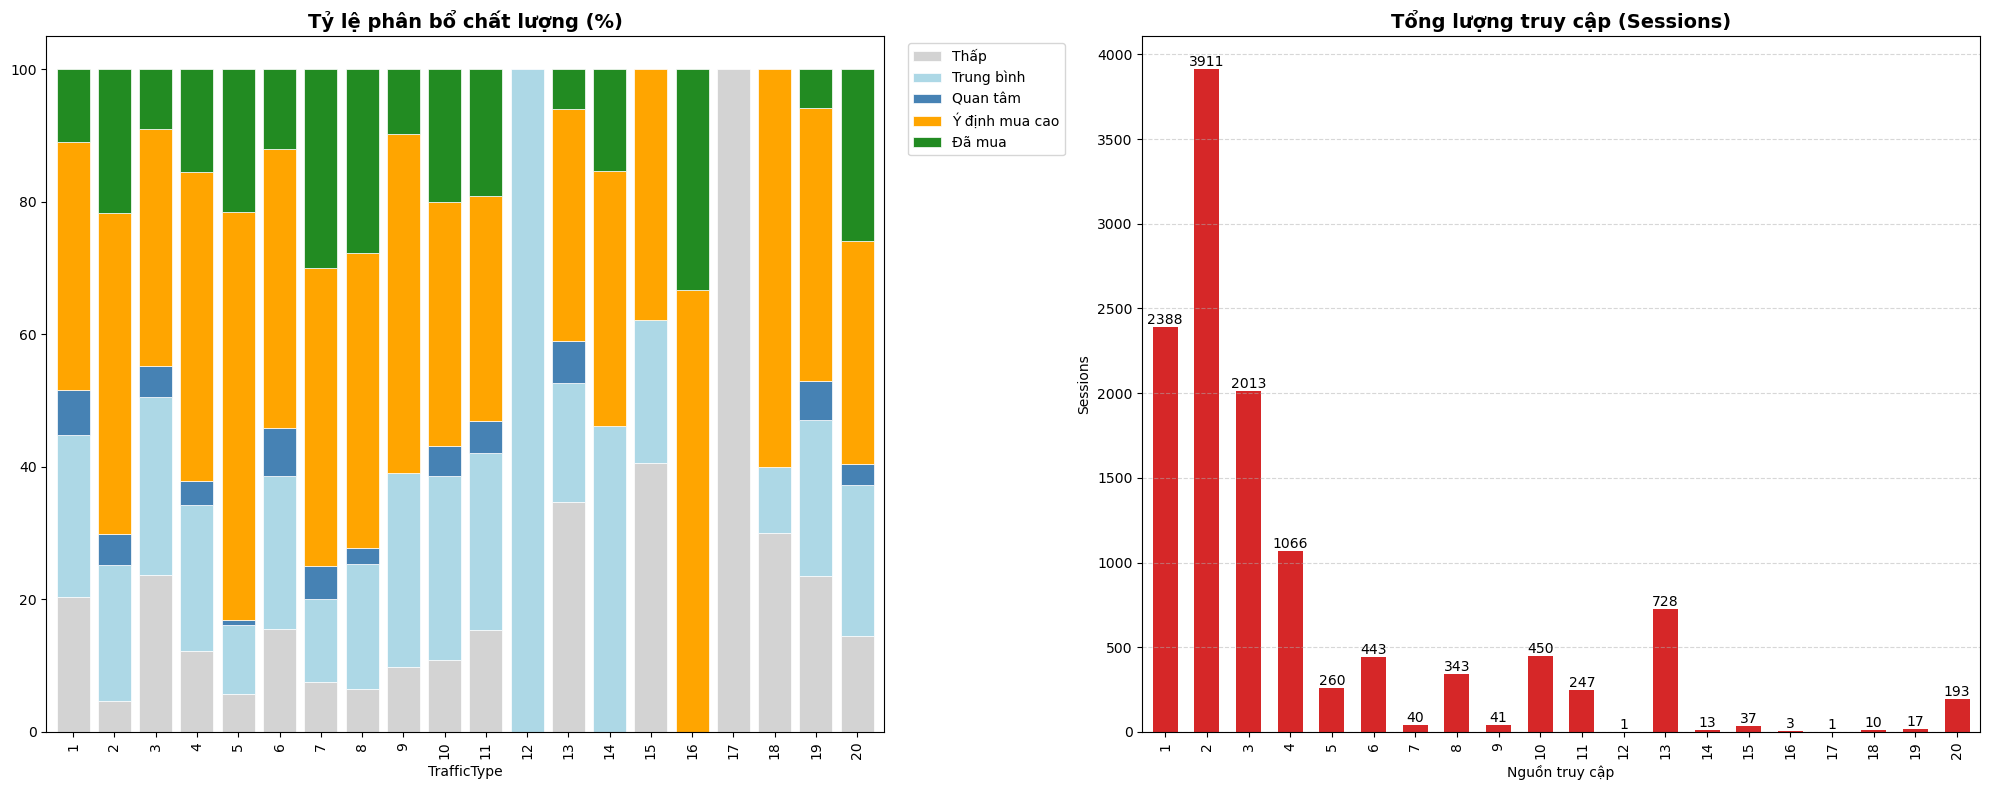

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Tạo bảng pivot tỷ lệ % các nhãn hành vi
quality_pivot = pd.crosstab(data['TrafficType'], data['Traffic_Label'], normalize='index') * 100

# Sắp xếp lại thứ tự cột cho logic 
column_order = ['Thấp', 'Trung bình', 'Quan tâm', 'Ý định mua cao', 'Đã mua']
quality_pivot = quality_pivot.reindex(columns=column_order)

# --- BIỂU ĐỒ 1: CẤU TRÚC CHẤT LƯỢNG ---
colors = ['#d3d3d3', '#add8e6', '#4682b4', '#ffa500', '#228b22']
quality_pivot.plot(kind='bar', stacked=True, color=colors, ax=ax1, 
                   width=0.8, edgecolor='white', linewidth=0.5)
ax1.set_title('Tỷ lệ phân bổ chất lượng (%)', fontsize=14, fontweight='bold')
ax1.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

# --- BIỂU ĐỒ 2: QUY MÔ TRAFFIC ---
scorecard.set_index('TrafficType')['Lượng truy cập'].plot(kind='bar', ax=ax2, color='#d62728', width=0.6)

ax2.set_title('Tổng lượng truy cập (Sessions)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Sessions')
ax2.set_xlabel('Nguồn truy cập') # Đặt tên trục X
ax2.grid(axis='y', linestyle='--', alpha=0.5)

# Hiển thị số liệu trên đầu cột
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d')

plt.tight_layout()
plt.show()

<div style="
  margin: 12px 0 16px 0;
  padding: 10px 14px;
  border-left: 3px solid #d1d5db;
  background-color: #f9fafb;
  border-radius: 6px;
">
  <strong>Nhận xét về hành vi mua hàng:</strong>
</div>


Dữ liệu cho thấy tín hiệu khá tích cực khi nhóm người dùng có **ý định mua cao** chiếm tỷ trọng lớn ở hầu hết các kênh Điều này cho thấy nguồn traffic hiện tại chủ yếu mang về người dùng có nhu cầu thật, không chỉ là truy cập ngẫu nhiên. Tuy nhiên, một vài kênh có xu hướng khác biệt là kênh 12 có người dùng chủ yếu ở mức ý định mua trung bình và kênh 17 và 18 phần lớn là ý định mua thấp, gần như không có đóng góp cho chuyển đổi. Tuy nhiên 3 kênh này đều có lượng truy cập quá thấp **(Kênh 12 và 17 chỉ có 1 session, Kênh 18 có 10 sessions)** nên không quan trọng.

* **Nhóm có lượng truy cập lớn nhất: Traffic Type 2, 1, 3**
  * Đây là ba kênh có lượng truy cập cao nhất, giữ vai trò chính trong tổng lưu lượng của website (chiếm phần lớn tổng sessions với các mức lần lượt là 3.913, 2.451 và 2.052).
  * Traffic Type 2:
    * Có lượng truy cập cao nhất đạt 3.913 sessions, đồng thời giữ được tỷ lệ chuyển đổi tốt.
    * Tỷ lệ traffic chất lượng thấp rất thấp, cho thấy khả năng tiếp cận đúng đối tượng.
  * Traffic Type 1 và Traffic Type 3:
    * Vẫn đóng góp đáng kể vào số đơn hàng (Type 1: 2.451 sessions, Type 3: 2.052 sessions).
    * Tuy nhiên, tỷ lệ traffic chất lượng thấp khá cao, cho thấy còn tồn tại sự lãng phí về nguồn lực.
* **Nhóm tầm trung: Traffic Type 4 và 13**
  * Hai kênh có quy mô gần tương đương nhưng hiệu quả khác nhau rõ rệt.
  * Traffic Type 4:
    * Đạt 1.069 sessions, tỷ lệ chuyển đổi cao hơn đáng kể.
    * Dù còn traffic chất lượng thấp, hiệu quả bán hàng vẫn đủ để bù đắp.
  * Traffic Type 13:
    * Lượng truy cập ở mức khá (738 sessions) nhưng tỷ lệ chuyển đổi rất thấp.
    * Traffic chất lượng thấp chiếm tỷ lệ cao, cho thấy kênh này chưa tiếp cận đúng nhóm người dùng phù hợp.
* **Nhóm quy mô trung bình: Traffic Type 5, 6, 8, 10, 11, 20**
  * Các kênh này không có lượng truy cập quá lớn (dao động trong khoảng 200 - 450 sessions) nhưng nhìn chung có chất lượng traffic tốt.
  * Traffic Type 5, 8 và 20:
    * Có tỷ lệ chuyển đổi cao và ít traffic chất lượng thấp (cụ thể Type 8: 343 sessions, Type 5: 260 sessions và Type 20: 198 sessions).
    * Trong đó, Traffic Type 8 nổi bật với quy mô và hiệu quả tốt nhất trong nhóm.
  * Traffic Type 6, 10 và 11:
    * Hiệu suất tương đối ổn định (Type 10 dẫn đầu nhóm này với 450 sessions, theo sát là Type 6 với 444 sessions).
    * Đóng góp đều vào doanh thu chung mà không gây nhiều vấn đề về chất lượng traffic.

* **Nhóm quy mô rất nhỏ**
  * Bao gồm các kênh còn lại với lượng truy cập dưới 50 phiên (như Type 7: 40 sessions, Type 9: 42 sessions, Type 15: 38 sessions...).
  * Do quy mô quá nhỏ, các chỉ số dễ biến động mạnh và không đủ độ tin cậy để rút ra xu hướng chung.

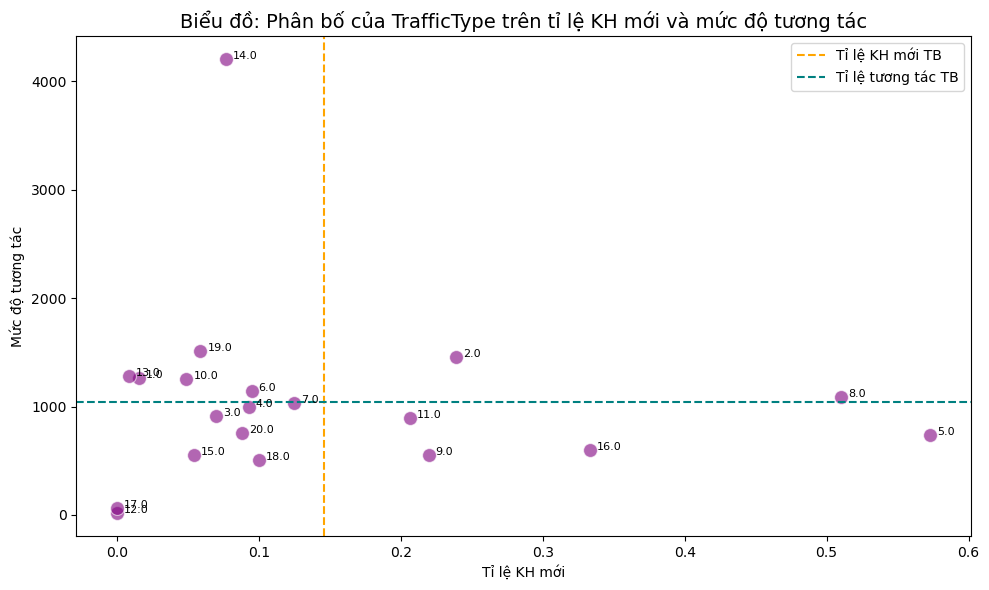

In [8]:
# Phân tích vai trò của nguồn truy cập trong hành trình khách hàng

plt.figure(figsize=(10, 6))
sns.scatterplot(data=scorecard, x='Tỉ lệ KH mới', y='Mức độ tương tác', s=100, color='purple', alpha=0.6)

# Gắn nhãn tên TrafficType
for _, row in scorecard.iterrows():
    plt.text(
        row['Tỉ lệ KH mới'] + 0.005,
        row['Mức độ tương tác'],
        row['TrafficType'],
        fontsize=8
    )

# Kẻ đường trung bình
plt.axvline(x=scorecard['Tỉ lệ KH mới'].mean(), color='orange', linestyle='--', label='Tỉ lệ KH mới TB')
plt.axhline(y=scorecard['Mức độ tương tác'].mean(), color='teal', linestyle='--', label='Tỉ lệ tương tác TB')

plt.title('Biểu đồ: Phân bố của TrafficType trên tỉ lệ KH mới và mức độ tương tác', fontsize=14)
plt.xlabel('Tỉ lệ KH mới')
plt.ylabel('Mức độ tương tác')
plt.legend()
plt.tight_layout()
plt.show()


<div style="
  margin: 12px 0 16px 0;
  padding: 10px 14px;
  border-left: 3px solid #d1d5db;
  background-color: #f9fafb;
  border-radius: 6px;
">
  <strong>Nhận xét vai trò của nguồn truy cập trong hành trình khách hàng:</strong>
</div>


**1. Góc phải trên: Nhóm “Tăng trưởng bền vững”**
  Nhóm này vừa thu hút được lượng lớn khách hàng mới, vừa duy trì mức độ tương tác cao, cho thấy hiệu quả tốt cả về quy mô lẫn chất lượng. Đây là nhóm kênh hoạt động ổn định và có giá trị cao đối với website.

* **Traffic Type 2 (quy mô lớn nhất hệ thống)**
  Traffic Type 2 đóng vai trò trụ cột của website. Với lượng truy cập rất lớn (khoảng 4.000 phiên), kênh này vẫn duy trì được chỉ số tương tác cao (khoảng 1.500 điểm) cùng tỷ lệ khách mới ổn định. Điều này cho thấy kênh không chỉ đóng góp mạnh về số lượng truy cập mà còn đảm bảo chất lượng tương tác ngay cả khi vận hành ở quy mô lớn.

* **Traffic Type 8 (quy mô trung bình, tiềm năng lớn)**
  Traffic Type 8 có quy mô hiện tại chưa bằng các kênh dẫn đầu (Type 1, 2, 3), tuy nhiên lại nổi bật nhờ tỷ lệ khách mới cao (trên 50%) và thời gian xem tốt. Với đặc điểm này, kênh thể hiện dư địa mở rộng rõ ràng và phù hợp để ưu tiên tăng ngân sách nhằm thúc đẩy tăng trưởng người dùng mới.

**2. Góc phải dưới: Nhóm “Mở rộng phễu”**
  Nhóm này tập trung vào việc thu hút khách hàng mới, chấp nhận thời gian tương tác ngắn, qua đó mở rộng đầu vào cho toàn bộ hệ thống.

* **Traffic Type 5 và 11 (quy mô trung bình)**
  Hai kênh này có tỷ lệ khách mới cao, trong đó Traffic Type 5 đạt gần 60%. Mặc dù mức độ tương tác không cao, quy mô truy cập ở mức khá giúp hai kênh này liên tục bổ sung người dùng mới cho website, góp phần bù đắp cho tỷ lệ rời bỏ tự nhiên.

**3. Góc trái trên: Nhóm “Nuôi dưỡng và duy trì người dùng”**
  Nhóm này chủ yếu bao gồm người dùng cũ quay lại, với mức độ tương tác cao và thời gian ở lại trang dài.

* **Traffic Type 1 (quy mô rất lớn, đứng thứ 2 hệ thống)**
  Traffic Type 1 là kênh có lượng truy cập lớn thứ hai toàn bộ website. Việc kênh này nằm trong nhóm tương tác cao cho thấy người dùng từ nguồn này quay lại để đọc và tìm hiểu nội dung, phản ánh mức độ gắn bó tốt.

* **Traffic Type 13 (quy mô trung bình khá)**
  Traffic Type 13 có đặc điểm tương tự Traffic Type 1 với thời gian tương tác cao nhưng khả năng thu hút khách mới hạn chế. Với quy mô gần 1.000 phiên, kênh này hoạt động như một nguồn nội dung chuyên sâu, tập trung giữ chân người dùng cũ.

**4. Góc trái dưới: Nhóm “Truy cập nhanh từ người dùng quen”**
  Nhóm này có đặc điểm chung là ít khách mới và thời gian xem ngắn, phản ánh hành vi truy cập nhanh.

* **Traffic Type 4 (quy mô rất lớn, thuộc nhóm 3 kênh cao nhất)**
  Traffic Type 4 là một trong ba nguồn truy cập lớn nhất của website. Dữ liệu cho thấy kênh này có lượng truy cập rất cao, nhưng người dùng thường ở lại trang trong thời gian ngắn. Phần lớn lưu lượng đến từ khách cũ, với mục đích truy cập khá rõ ràng.

* **Traffic Type 3 (quy mô rất lớn, thuộc nhóm 3 kênh cao nhất)**
  Traffic Type 3 có đặc điểm tương tự Traffic Type 4: lượng truy cập lớn, tỷ lệ khách mới thấp và mức độ tương tác hạn chế. Việc hai kênh này chiếm tỷ trọng lớn đang làm giảm thời gian ở lại trang trung bình của toàn bộ website.


<div style="
  margin: 28px 0 14px 0;
  padding: 12px 16px;
  border: 1px dashed #c7d2fe;
  border-radius: 14px;
  background-color: #fbfdff;
  max-width: 98%;
  box-sizing: border-box;
">
  <div style="
    font-size: 1.15em;
    font-weight: 700;
    color: #1e3a8a;
    text-align: center;
  ">
    NHẬN XÉT TỔNG HỢP VỀ HIỆU QUẢ CÁC KÊNH TRAFFIC
  </div>
</div>


<div style="
  margin: 16px 0 32px 0;
  padding: 16px 20px;
  border: 1px solid #dbeafe;
  border-radius: 12px;
  background-color: #f8fbff;
  max-width: 98%;
  box-sizing: border-box;
">

**1. Đánh giá chung**
  Nhìn chung, dữ liệu cho thấy phần lớn lượng truy cập vào website đến từ những người dùng có nhu cầu thật. Điều này cho thấy các kênh traffic hiện tại không mang tính ngẫu nhiên mà có định hướng khá rõ. Tuy nhiên, hiệu quả giữa các kênh lớn không đồng đều. Website đang phụ thuộc nhiều vào một vài kênh hoạt động tốt, trong khi một số kênh khác có quy mô lớn nhưng hiệu quả thấp, làm giảm hiệu suất chung.

**2. Phân tích theo nhóm kênh**

* **Nhóm hiệu quả cao (Traffic Type 2 và 8)**
  Đây là nhóm kênh hoạt động ổn định và mang lại giá trị rõ rệt, cân bằng được giữa lượng truy cập và chất lượng người dùng.

    * **Traffic Type 2**
    Đây là kênh có lượng truy cập lớn nhất. Dù quy mô cao, kênh này vẫn giữ được mức độ tương tác tốt và khả năng chuyển đổi cao. Người dùng từ kênh này vừa có xu hướng quay lại, vừa có khả năng mua hàng, trong khi lượng truy cập kém chất lượng ở mức thấp. Traffic Type 2 đóng vai trò quan trọng trong việc duy trì hiệu quả chung của website.

    * **Traffic Type 8**
    Traffic Type 8 chưa có quy mô quá lớn nhưng lại thu hút nhiều người dùng mới và giữ chân người dùng khá tốt. Kênh này cho thấy tiềm năng phát triển rõ ràng. Nếu được đầu tư thêm, Traffic Type 8 có thể mang lại lượng người dùng mới đáng kể cho website.

* **Nhóm người dùng quen thuộc (Traffic Type 4 và 1)**
  Nhóm này chủ yếu đến từ người dùng quay lại, tuy nhiên cách họ sử dụng website lại khác nhau.

    * **Traffic Type 4**
    Người dùng từ Traffic Type 4 thường truy cập nhanh và rời đi sớm, nhưng tỷ lệ mua hàng lại cao. Điều này cho thấy họ vào website với mục đích rõ ràng, thường là để hoàn tất một hành động cụ thể. Dù thời gian tương tác không cao, kênh này vẫn mang lại hiệu quả tốt.

    * **Traffic Type 1**
    Traffic Type 1 là kênh có lượng truy cập lớn, với thời gian người dùng ở lại trang khá lâu. Người dùng có xu hướng đọc nhiều nội dung nhưng tỷ lệ mua hàng chưa cao. Điều này cho thấy kênh này phù hợp để cung cấp thông tin và giữ chân người dùng, nhưng cần cải thiện cách dẫn dắt để khuyến khích người dùng thực hiện hành động tiếp theo.

* **Nhóm thu hút người dùng mới (Traffic Type 5 và 11)**
  Các kênh trong nhóm này có vai trò thu hút người dùng mới cho website. Tỷ lệ khách mới cao, thời gian tương tác ngắn, nhưng chất lượng truy cập ở mức chấp nhận được. Việc duy trì các kênh này giúp website liên tục có thêm người dùng mới.

* **Nhóm hiệu quả thấp, cần xem xét lại (Traffic Type 3 và 13)**
  Đây là những kênh đang ảnh hưởng tiêu cực đến hiệu suất chung.

    * **Traffic Type 3**
    Traffic Type 3 có lượng truy cập lớn nhưng người dùng ít tương tác, tỷ lệ khách mới thấp và nhiều truy cập kém chất lượng. Kênh này cần được kiểm tra lại nguồn traffic để tránh lãng phí.

    * **Traffic Type 13**
    Người dùng từ Traffic Type 13 dành nhiều thời gian trên website nhưng gần như không thực hiện hành động mua hàng. Điều này cho thấy nội dung hoặc đối tượng người dùng của kênh này chưa phù hợp với mục tiêu của website.

* **Nhóm quy mô nhỏ**
  Các Traffic Type 12, 17 và 18 có lượng truy cập thấp và chất lượng không cao, nên không ảnh hưởng nhiều đến bức tranh tổng thể và không cần ưu tiên phân tích sâu.
  
**3. Hạn chế của phân tích**

Phân tích vẫn còn một số giới hạn cần được cân nhắc khi đưa ra kết luận.

* Nguồn traffic đã được mã hóa nên không xác định được kênh cụ thể. Điều này khiến các đề xuất tối ưu chỉ dừng ở mức tổng quát, chưa thể đi sâu vào từng nền tảng.

* Phân tích chưa có dữ liệu về chi phí, vì vậy chưa đánh giá được hiệu quả thực sự của các kênh về mặt lợi nhuận. Kết quả hiện tại mới phản ánh hành vi và chuyển đổi, chưa phản ánh bài toán chi phí.

* Việc phân tích theo từng phiên truy cập riêng lẻ chưa thể hiện đầy đủ hành trình người dùng. Một số kênh có vai trò hỗ trợ ở giai đoạn đầu có thể bị đánh giá thấp nếu chỉ nhìn vào kết quả cuối cùng.
</div>


<div style="
  margin: 28px 0 20px 0;
  padding: 14px 18px;
  border-left: 6px solid #2563eb;
  background-color: #eff6ff;
  border-radius: 6px;
  max-width: 90%;
">
  <h2 style="
    margin: 0;
    font-weight: 700;
    color: #1e3a8a;
  ">
    2. Tại sao cùng là thời điểm có lượng truy cập đạt đỉnh, nhưng hiệu suất chuyển đổi lại trái ngược nhau giữa Tháng 5 và Tháng 11?
  </h2>
</div>



<div style="margin: 26px 0 18px 0;">
  <h3 style="
    margin: 0;
    font-weight: 700;
    padding-bottom: 6px;
    border-bottom: 3px solid #e5e7eb;
  ">
    I. Mục tiêu phân tích
  </h3>
</div>


Cụ thể, phân tích này nhằm tìm kiếm bằng chứng từ dữ liệu hành vi để giải thích:

- Yếu tố hành vi nào (Tỷ lệ thoát, Độ sâu xem trang) khiến traffic tháng 5 tuy đông nhưng không tạo ra đơn hàng?
- Động lực nào (Khách mới hay khách cũ, mức độ quan tâm) thúc đẩy traffic tháng 11 đạt tỷ lệ chuyển đổi cao nhất năm?

<div style="
  margin: 18px 0 10px 0;
  padding-left: 12px;
  border-left: 3px solid #c7d2fe;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    Vì sao cần phân tích vấn đề này?
  </h4>
</div>


  * Tránh việc đánh giá hiệu quả chỉ dựa trên số lượng truy cập, vì traffic cao chưa chắc đã mang lại hiệu quả tốt.
  * Làm rõ sự khác biệt giữa tháng 5 và tháng 11, tránh hiểu nhầm rằng hai giai đoạn có lượng truy cập cao thì chất lượng người dùng giống nhau.
  * Xác định nguyên nhân khiến hiệu suất tháng 5 thấp, do nhu cầu thị trường hay do chất lượng traffic chưa phù hợp.
  * Hiểu rõ hơn sự khác nhau trong hành vi và mức độ sẵn sàng mua của người dùng theo từng thời điểm trong năm.

<div style="
  margin: 18px 0 10px 0;
  padding-left: 12px;
  border-left: 3px solid #c7d2fe;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    Phân tích này mang lại insight gì?
  </h4>
</div>


* Phân biệt được giai đoạn người dùng chủ yếu xem và tìm hiểu với giai đoạn người dùng có xu hướng mua hàng.
* Đánh giá chính xác vai trò của khách hàng mới, tránh tình trạng thu hút nhiều người nhưng không mang lại hiệu quả thực tế.
* Phát hiện sớm các dấu hiệu như traffic tăng nhưng đơn hàng không tăng để kịp thời điều chỉnh chiến dịch.

<div style="
  margin: 18px 0 10px 0;
  padding-left: 12px;
  border-left: 3px solid #c7d2fe;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    Ai cần quan tâm đến kết quả này?
  </h4>
</div>

* Người phụ trách marketing hoặc quản lý ngân sách, để quyết định nên tập trung chi tiêu vào tháng nào.
* Nhóm triển khai quảng cáo, nhằm điều chỉnh mục tiêu và cách chạy chiến dịch phù hợp với hành vi người dùng từng giai đoạn.
* Nhóm nội dung, để xây dựng thông điệp đúng với mức độ quan tâm và nhu cầu mua của người dùng.

<div style="
  margin: 18px 0 10px 0;
  padding-left: 12px;
  border-left: 3px solid #c7d2fe;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    Phân tích này hỗ trợ quyết định gì?
  </h4>
</div>

* Giảm lãng phí ngân sách khi cố tạo đơn hàng trong giai đoạn người dùng chưa sẵn sàng mua.
* Hỗ trợ xây dựng chiến lược tiếp cận lại người dùng hiệu quả hơn giữa các tháng trong năm.
* Giúp dự báo doanh thu và đặt chỉ tiêu sát thực tế, không bị lệch do chỉ nhìn vào dự báo lượng truy cập.

<div style="margin: 26px 0 18px 0;">
  <h3 style="
    margin: 0;
    font-weight: 700;
    padding-bottom: 6px;
    border-bottom: 3px solid #e5e7eb;
  ">
    II. Giải quyết câu hỏi
  </h3>
</div>


<div style="
  margin: 18px 0 10px 0;
  padding-left: 12px;
  border-left: 3px solid #c7d2fe;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    a. Tiền xử lý
  </h4>
</div>

**1. Tổng hợp dữ liệu theo Tháng**
* Sử dụng phương pháp gom nhóm (`groupby`) theo cột `Month`.

* Tính toán các chỉ số đại diện cho **Số lượng** và **Chất lượng** để so sánh:
    * Đếm tổng số phiên truy cập (`count`) để xác nhận lại đỉnh traffic tháng 5 và 11.
    * Tính trung bình `Revenue` để thấy sự chênh lệch hiệu quả.
    * Tính trung bình `BounceRates` và `ProductRelated` để đo mức độ quan tâm thực sự.
    * Tính trung bình `Is_New_Visitor` để xem tỷ trọng khách mới thay đổi thế nào vào tháng 11.

Chúng ta sẽ sử dụng phương pháp **Correlation Comparison** trên biểu đồ thời gian để tìm ra nguyên nhân của sự khác biệt hiệu suất.

**2. Chuẩn hóa Min-Max**
* Mục đích: Ép BounceRates (đơn vị %) và ProductRelated (đơn vị số lượt) về cùng một thang đo chuẩn [0, 1].

* Logic thực hiện:

    * Tìm giá trị nhỏ nhất (Min) và lớn nhất (Max) của từng cột trong suốt cả năm. 

    * Áp dụng công thức: $Value_{new} = \frac{Value_{current} - Min}{Max - Min}$

* Lý do: Khi cả hai chỉ số đều chạy từ 0 đến 1:0 đại diện cho mức thấp nhất trong năm. 1 đại diện cho mức cao nhất trong năm. Chúng ta có thể vẽ 2 đường này trên cùng một trục phải, giúp dễ dàng nhìn thấy sự tương quan (cùng tăng hay cùng giảm) mà không bị lệch tỷ lệ.

In [9]:
monthly_data = data.groupby('Month', observed=True).agg({
    'Administrative': 'count',       # Đếm tổng traffic
    'Revenue': 'mean',                # Tính Conversion Rate
    'BounceRates': 'mean',            # Tính Bounce Rate trung bình
    'ProductRelated': 'mean',         # Tính số trang xem trung bình
    'Is_New_Visitor': 'mean'          # Tính tỷ lệ khách mới trung bình
}).reset_index()

# 4. Đổi tên cột 
monthly_data.columns = [
    'Month', 
    'Lượng truy cập', 
    'Tỉ lệ chuyển đổi', 
    'Bounce Rate TB', 
    'ProductViews TB', 
    'Tỉ lệ KH mới'
]

# 5. Hiển thị bảng số liệu đã tổng hợp để kiểm tra
print(monthly_data)

  Month  Lượng truy cập  Tỉ lệ chuyển đổi  Bounce Rate TB  ProductViews TB  \
0   Feb             181          0.016575        0.044486        11.353591   
1   Mar            1860          0.103226        0.017223        20.281720   
2   May            3329          0.109643        0.025046        26.755182   
3  June             285          0.101754        0.033366        36.435088   
4   Jul             432          0.152778        0.024676        36.407407   
5   Aug             433          0.175520        0.018211        38.258661   
6   Sep             448          0.191964        0.012183        33.104911   
7   Oct             549          0.209472        0.011849        33.566485   
8   Nov            2982          0.254863        0.018289        46.280013   
9   Dec            1706          0.126612        0.017935        28.327081   

   Tỉ lệ KH mới  
0      0.005525  
1      0.124731  
2      0.095825  
3      0.105263  
4      0.125000  
5      0.166282  
6      0.241071

In [10]:
scaler = MinMaxScaler()

# Xác định các cột cần chuẩn hóa
cols_to_scale = ['Bounce Rate TB', 'ProductViews TB']

# Thực hiện chuẩn hóa và gán vào các cột mới
# Tạo cột có đuôi "_Scaled" để giữ lại cột gốc 
scaled_values = scaler.fit_transform(monthly_data[cols_to_scale])

monthly_data['Bounce Rate TB_Scaled'] = scaled_values[:, 0]
monthly_data['ProductViews TB_Scaled'] = scaled_values[:, 1]

# 4. Kiểm tra kết quả
print("Dữ liệu sau khi chuẩn hóa (Min-Max Scaling):")
print(monthly_data[['Month', 'Bounce Rate TB', 'Bounce Rate TB_Scaled', 'ProductViews TB', 'ProductViews TB_Scaled']])

Dữ liệu sau khi chuẩn hóa (Min-Max Scaling):
  Month  Bounce Rate TB  Bounce Rate TB_Scaled  ProductViews TB  \
0   Feb        0.044486               1.000000        11.353591   
1   Mar        0.017223               0.164651        20.281720   
2   May        0.025046               0.404362        26.755182   
3  June        0.033366               0.659281        36.435088   
4   Jul        0.024676               0.393029        36.407407   
5   Aug        0.018211               0.194917        38.258661   
6   Sep        0.012183               0.010222        33.104911   
7   Oct        0.011849               0.000000        33.566485   
8   Nov        0.018289               0.197313        46.280013   
9   Dec        0.017935               0.186474        28.327081   

   ProductViews TB_Scaled  
0                0.000000  
1                0.255627  
2                0.440972  
3                0.718124  
4                0.717331  
5                0.770336  
6                0.62

<div style="
  margin: 18px 0 10px 0;
  padding-left: 12px;
  border-left: 3px solid #c7d2fe;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    b. Phân tích
  </h4>
</div>

**1. Phương pháp Trực quan hóa**

Phân tích sử dụng hai biểu đồ chính nhằm làm rõ sự khác biệt về chất lượng và hiệu quả giữa các tháng có lượng truy cập cao.

* **Biểu đồ 1: Đánh giá chất lượng Traffic**

    * Sử dụng biểu đồ kết hợp.
    * Trục trái thể hiện `Traffic` bằng cột để phản ánh quy mô truy cập theo tháng.
    * Trục phải gồm hai đường, trong đó `Bounce Rate` và `Avg. ProductViews` được dùng để mô tả hành vi người dùng.
    * Biểu đồ này nhằm làm rõ vì sao tháng 5 có lượng truy cập lớn nhưng hiệu quả thấp, với kỳ vọng thể hiện tỷ lệ thoát cao và mức độ xem sản phẩm thấp.

* **Biểu đồ 2: Phân tích động lực tăng trưởng**

    * Sử dụng biểu đồ đường theo thời gian.
    * Trục X là các tháng trong năm.
    * Trục Y thể hiện đồng thời `New Visitor Rate` và `Conversion Rate`.
    * Mục tiêu của biểu đồ là kiểm tra mối liên hệ giữa lượng khách mới và hiệu quả chuyển đổi trong giai đoạn cuối năm. Nếu hai chỉ số này biến động cùng chiều, có thể xem khách mới là yếu tố đóng góp trực tiếp vào tăng trưởng doanh thu.

**2. Trình tự Phân tích và Kiểm định**

Phân tích được thực hiện theo từng bước tương ứng với hai biểu đồ đã xây dựng.

* **Bước 1: Phân tích hiệu suất thấp của Tháng 5 dựa trên Biểu đồ 1**

    * Quan sát mối quan hệ giữa `Traffic` và `Bounce Rate`.
    * Trọng tâm là xác định liệu tỷ lệ thoát có tăng cao cùng với lượng truy cập hay không. Nếu có, điều này cho thấy phần lớn traffic tháng 5 mang tính vãng lai.
    * Đồng thời xem xét `Avg. ProductViews`. Giá trị thấp của chỉ số này sẽ củng cố nhận định rằng người dùng chủ yếu xem lướt và chưa có nhu cầu mua rõ ràng.

* **Bước 2: Phân tích động lực tăng trưởng của Tháng 11 dựa trên Biểu đồ 2**

    * Tập trung đánh giá sự đồng biến giữa `New Visitor Rate` và `Conversion Rate`.
    * Nếu cả hai chỉ số cùng tăng mạnh trong tháng 11 và duy trì sang tháng 12, có thể kết luận rằng nhu cầu mua sắm cuối năm đủ lớn để thúc đẩy cả nhóm khách hàng mới phát sinh hành vi mua hàng ngay trong lần truy cập đầu tiên.

**3. Kết quả đầu ra**

Sau khi hoàn tất phân tích, nghiên cứu dự kiến mang lại các kết quả sau.

* Hai biểu đồ trực quan giúp làm nổi bật sự khác biệt rõ ràng giữa tháng 5 với lượng truy cập kém hiệu quả và tháng 11 với hiệu suất chuyển đổi cao.
* Các chỉ số định lượng cụ thể cho thấy mức chênh lệch giữa các tháng, chẳng hạn như tỷ lệ thoát và số trang sản phẩm được xem.
* Cơ sở dữ liệu rõ ràng để đề xuất chiến lược phân bổ ngân sách phù hợp hơn, trong đó tháng 5 ưu tiên xây dựng nhận diện và nuôi dưỡng khách hàng, còn tháng 11 tập trung tối đa vào hoạt động chuyển đổi và bán hàng.


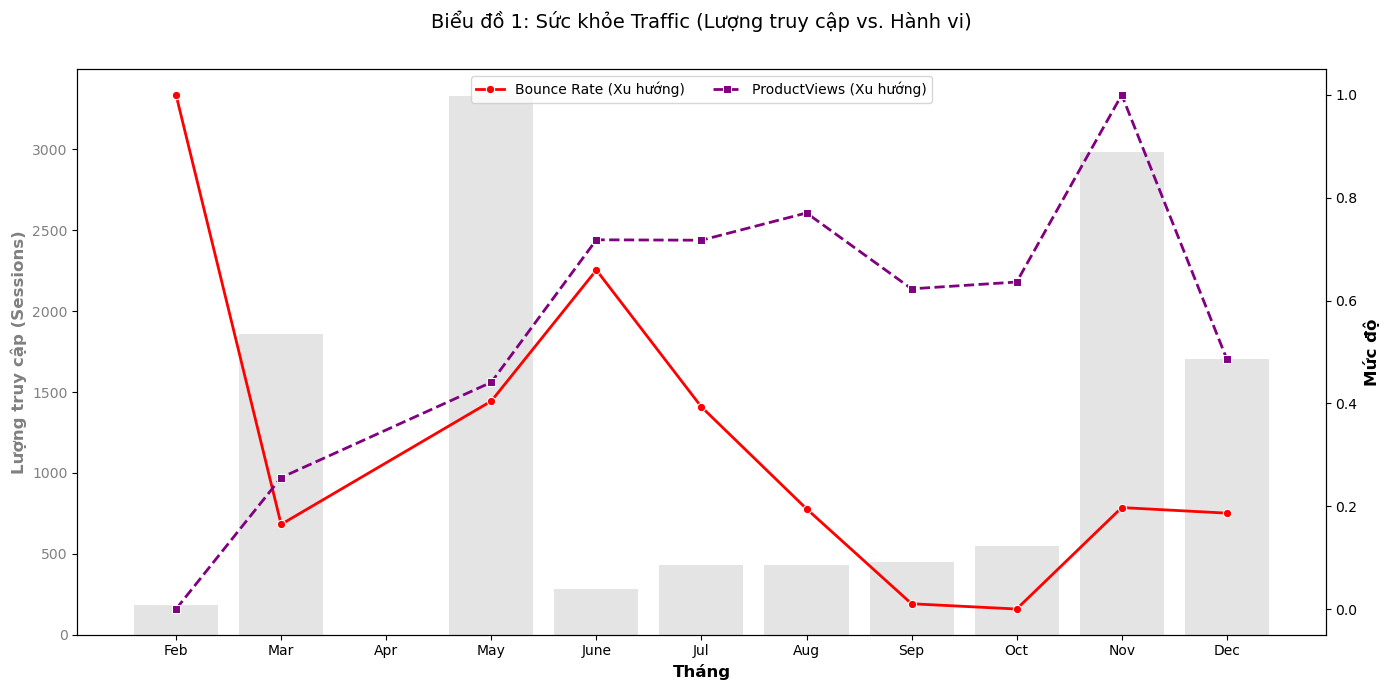

In [11]:
fig, ax1 = plt.subplots(figsize=(14, 7))

sns.barplot(data=monthly_data, x='Month', y='Lượng truy cập', 
            color='lightgray', alpha=0.6, ax=ax1, zorder=1)

ax1.set_ylabel('Lượng truy cập (Sessions)', color='gray', fontsize=12, fontweight='bold')
ax1.set_xlabel('Tháng', fontsize=12, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='gray')

ax2 = ax1.twinx()

# Vẽ đường Bounce Rate (Dùng cột Scaled)
sns.lineplot(data=monthly_data, x='Month', y='Bounce Rate TB_Scaled', 
             color='red', marker='o', linewidth=2, ax=ax2, label='Bounce Rate (Xu hướng)', zorder=3)

# Vẽ đường ProductViews (Dùng cột Scaled)
sns.lineplot(data=monthly_data, x='Month', y='ProductViews TB_Scaled', 
             color='purple', marker='s', linestyle='--', linewidth=2, ax=ax2, label='ProductViews (Xu hướng)', zorder=3)
 
ax2.set_ylabel('Mức độ', color='black', fontsize=12, fontweight='bold')
ax2.grid(False) # Tắt lưới của trục phải cho đỡ rối

lines, labels = ax2.get_legend_handles_labels()
ax2.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=2)

plt.title('Biểu đồ 1: Sức khỏe Traffic (Lượng truy cập vs. Hành vi)', fontsize=14, pad=30)
plt.tight_layout()
plt.show()

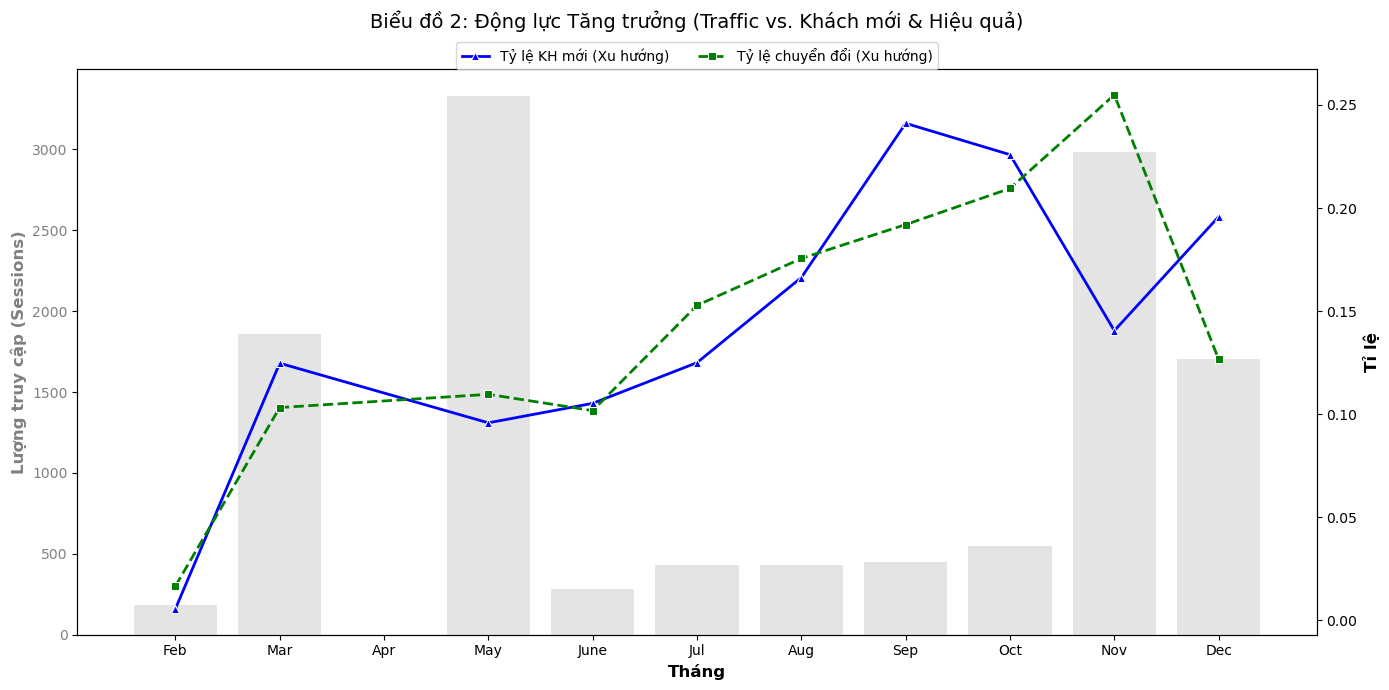

In [12]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# 1. TRỤC TRÁI: LƯỢNG TRUY CẬP 
sns.barplot(data=monthly_data, x='Month', y='Lượng truy cập', 
            color='lightgray', alpha=0.6, ax=ax1, zorder=1)

ax1.set_ylabel('Lượng truy cập (Sessions)', color='gray', fontsize=12, fontweight='bold')
ax1.set_xlabel('Tháng', fontsize=12, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='gray')

# 2. TRỤC PHẢI: ĐỘNG LỰC TĂNG TRƯỞNG
ax2 = ax1.twinx()

# Vẽ đường Tỉ lệ KH mới 
sns.lineplot(data=monthly_data, x='Month', y='Tỉ lệ KH mới', 
             color='blue', marker='^', linewidth=2, ax=ax2, label='Tỷ lệ KH mới (Xu hướng)', zorder=3)

# Vẽ đường Tỉ lệ chuyển đổi
sns.lineplot(data=monthly_data, x='Month', y='Tỉ lệ chuyển đổi', 
             color='green', marker='s', linestyle='--', linewidth=2, ax=ax2, label='Tỷ lệ chuyển đổi (Xu hướng)', zorder=3)

ax2.set_ylabel('Tỉ lệ', color='black', fontsize=12, fontweight='bold')
ax2.grid(False)

lines, labels = ax2.get_legend_handles_labels()
ax2.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.06), ncol=2)

plt.title('Biểu đồ 2: Động lực Tăng trưởng (Traffic vs. Khách mới & Hiệu quả)', fontsize=14, pad=30)
plt.tight_layout()
plt.show()

<div style="
  margin: 28px 0 14px 0;
  padding: 12px 16px;
  border: 1px dashed #c7d2fe;
  border-radius: 14px;
  background-color: #fbfdff;
  max-width: 98%;
  box-sizing: border-box;
">
  <div style="
    font-size: 1.15em;
    font-weight: 700;
    color: #1e3a8a;
    text-align: center;
  ">
    INSIGHTS RÚT RA ĐƯỢC
  </div>
</div>


<div style="
  margin: 16px 0 32px 0;
  padding: 16px 20px;
  border: 1px solid #dbeafe;
  border-radius: 12px;
  background-color: #f8fbff;
  max-width: 98%;
  box-sizing: border-box;
">

**1. Phân tích trọng tâm: Sự đối lập giữa Tháng 5 và Tháng 11**

Khi kết hợp cả hành vi người dùng và tỷ lệ khách hàng mới, sự khác biệt giữa hai tháng cao điểm này trở nên rõ ràng hơn.

**Tháng 5: Lượng truy cập cao nhưng người dùng chưa sẵn sàng mua**

* Tháng 5 có `Traffic` cao nhất năm, hơn 3.300 phiên.
* Tuy nhiên, `New Visitor Rate` chỉ ở mức thấp, khoảng 0.10. Điều này cho thấy lượng truy cập lớn không đến từ việc thu hút nhiều khách mới, mà chủ yếu là người dùng cũ hoặc khách ghé thăm ngẫu nhiên.
* `Bounce Rate` tăng cao, khoảng 0.026, phản ánh việc nhiều người rời trang sớm.
* `ProductViews` ở mức thấp, khoảng 27 trang mỗi phiên.
* `Conversion Rate` chỉ đạt khoảng 0.10, không tương xứng với lượng truy cập.
* Có thể thấy người dùng trong tháng 5 chủ yếu vào xem lướt hoặc khảo sát, chưa có động lực mua sắm rõ ràng.

**Tháng 11: Doanh thu tăng mạnh nhờ khách quay lại**

* `Traffic` tháng 11 đứng thứ hai trong năm.
* `Conversion Rate` tăng mạnh và đạt mức cao nhất năm, khoảng 0.24.
* Ngược lại, `New Visitor Rate` lại giảm xuống khoảng 0.14, thấp hơn rõ rệt so với giai đoạn trước đó.
* Điều này cho thấy phần lớn đơn hàng trong tháng 11 đến từ khách hàng cũ hoặc những người đã từng truy cập website.
* Hành vi người dùng rất tích cực khi `Bounce Rate` giảm xuống mức thấp, khoảng 0.018, và `ProductViews` đạt mức cao kỷ lục, gần 47 trang mỗi phiên.
* Tháng 11 là thời điểm người dùng quay lại với mục tiêu mua hàng rõ ràng và quyết liệt hơn.

**Insights & Kết luận**

* **Bẫy chỉ số ảo**

    * Tháng 5 cho thấy lượng truy cập cao không đồng nghĩa với hiệu quả kinh doanh.
    * Nếu chỉ đánh giá dựa trên số người vào website mà không xét đến hành vi và chuyển đổi, kết luận sẽ dễ bị sai lệch.
    * Đây là ví dụ điển hình cho việc traffic nhiều nhưng chất lượng thấp.

* **Chiến lược phù hợp theo thời điểm**

    * Hai giai đoạn tháng 5 và tháng 11 cần được xác định mục tiêu khác nhau.
    * Tháng 5 phù hợp để tăng độ nhận diện và thu thập dữ liệu người dùng phục vụ cho các hoạt động sau.
    * Tháng 11 cần tập trung tối đa vào trải nghiệm mua hàng và các chương trình ưu đãi để thúc đẩy chốt đơn.

* **Sự thay đổi trong tâm lý người dùng**

    * Hành vi người dùng cho thấy sự chuyển dịch rõ ràng từ trạng thái tò mò sang trạng thái sẵn sàng mua.
    * Người dùng thường cần thời gian tiếp cận và cân nhắc trước khi đưa ra quyết định mua sắm vào cuối năm.

**2. Phân tích các giai đoạn đặc biệt khác và mối liên hệ**

**Tháng 9 và Tháng 10**

* `New Visitor Rate` tăng mạnh và đạt đỉnh trong giai đoạn này, khoảng 0.24.
* Đồng thời, `Bounce Rate` giảm xuống mức thấp nhất năm.
* Điều này cho thấy website thu hút được nhiều khách mới chất lượng cao.
* Dù `Conversion Rate` chưa đạt đỉnh, nhóm người dùng này có khả năng đã quay lại mua hàng trong tháng 11.

**Tháng 6**

* Sau cao điểm tháng 5, `New Visitor Rate` vẫn ở mức thấp, khoảng 0.10.
* `Bounce Rate` tăng lên mức cao nhất năm, khoảng 0.036.
* Điều này cho thấy website vừa không giữ được khách cũ, vừa không thu hút được khách mới, dẫn đến hiệu quả thấp.

**Tháng 12**

* `New Visitor Rate` tăng trở lại, từ khoảng 0.14 lên 0.20.
* Trong khi đó, `Conversion Rate` giảm rõ rệt so với tháng 11.
* Điều này cho thấy nhu cầu mua sắm của khách cũ đã giảm, và website bắt đầu bước sang giai đoạn tìm kiếm khách hàng mới cho chu kỳ tiếp theo.

**Insights & Kết luận**

* **Hiệu ứng chuẩn bị và thu hoạch**

  * Doanh thu cao trong tháng 11 là kết quả của việc thu hút khách mới hiệu quả ở các tháng trước đó, đặc biệt là tháng 9 và 10.
  * Nếu cắt giảm ngân sách ở giai đoạn này vì chưa thấy đơn hàng tăng ngay, hiệu quả của tháng 11 sẽ bị ảnh hưởng đáng kể.

* **Cảnh báo từ tháng 6**

  * Tháng 6 cho thấy dấu hiệu suy giảm rõ rệt sau cao điểm tháng 5.
  * Website không giữ chân được người dùng, dẫn đến tỷ lệ thoát cao và hiệu quả thấp.
  * Điều này cho thấy cần có chiến lược duy trì người dùng sau các chiến dịch lớn, tránh để traffic rơi tự do.

**3. Hạn chế của các Insights trên**

* **Hạn chế do việc tổng hợp dữ liệu theo tháng**

    * **Mất đi các biến động ngắn hạn:** Việc gom nhóm dữ liệu theo tháng đã san phẳng các đỉnh và đáy trong từng ngày. Ví dụ, sự thành công của tháng 11 có thể chỉ đến từ 1-2 ngày sale lớn chứ không phải là xu hướng của cả tháng. Phân tích hiện tại chưa thấy được tác động của các sự kiện cụ thể này.

* **Hạn chế trong việc suy luận hành vi khách hàng cũ**

    * **Giả định dựa trên tương quan thay vì nhân quả:** Kết luận rằng "khách hàng tháng 11 là khách cũ quay lại từ tháng 9-10" đang dựa trên sự suy luận từ việc `New Visitor Rate` giảm và `Conversion Rate` tăng. Tuy nhiên, dữ liệu hiện tại không có mã định danh người dùng (User ID) để theo dõi chính xác hành trình của một người cụ thể đi từ tháng 9 sang tháng 11.

    * **Khả năng về tệp khách hàng khác:** Có khả năng nhóm khách mua hàng tháng 11 là một nhóm khách hoàn toàn khác, họ là khách cũ lâu năm chứ không nhất thiết là những người mới được tiếp cận vào tháng 9-10.

* **Thiếu ngữ cảnh về ngành hàng và hoạt động Marketing**

    * **Yếu tố mùa vụ của sản phẩm:** Phân tích chưa tính đến yếu tố ngành hàng. 
    * **Tác động của ngân sách quảng cáo:** Chúng ta không có dữ liệu về chi phí Marketing. Nếu tháng 5 ngân sách chạy quảng cáo tăng gấp đôi tháng 11, thì việc traffic tăng vọt là hiển nhiên và việc tỷ lệ chuyển đổi thấp là do mở rộng tệp khách hàng quá nhanh. Nếu thiếu biến số này, kết luận về hiệu quả chưa thực sự toàn diện.

</div>

<div style="
  margin: 28px 0 20px 0;
  padding: 14px 18px;
  border-left: 6px solid #2563eb;
  background-color: #eff6ff;
  border-radius: 6px;
  max-width: 90%;
">
  <h2 style="
    margin: 0;
    font-weight: 700;
    color: #1e3a8a;
  ">
    3. Câu hỏi: Chỉ số `PageValues` (Giá trị trang) đóng vai trò quyết định như thế nào trong việc định hình hành vi mua hàng và phân loại khách hàng trong phễu chuyển đổi?
  </h2>
</div>



<div style="margin: 26px 0 18px 0;">
  <h3 style="
    margin: 0;
    font-weight: 700;
    padding-bottom: 6px;
    border-bottom: 3px solid #e5e7eb;
  ">
    I. Mục tiêu phân tích
  </h3>
</div>


**Cụ thể:**
* Có sự khác biệt đáng kể nào về giá trị trung bình của `PageValues` giữa nhóm khách hàng mua (`Revenue=True`) và không mua (`Revenue=False`) không?
* Liệu PageValues có phải là chỉ số "báo hiệu" mạnh nhất, nơi mà giá trị càng cao thì xác suất chuyển đổi (`Conversion Rate`) càng tăng tuyến tính?

<div style="
  margin: 18px 0 10px 0;
  padding-left: 12px;
  border-left: 3px solid #c7d2fe;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    Vì sao cần phân tích vấn đề này?
  </h4>
</div>


Trong Google Analytics, PageValues là một chỉ số tổng hợp đánh giá giá trị trung bình của một trang web mà người dùng đã truy cập trước khi hoàn tất giao dịch thương mại điện tử. Hiểu được mối liên hệ giữa chỉ số này và quyết định mua hàng giúp xác định đâu là các trang "nút thắt" quan trọng.

<div style="
  margin: 18px 0 10px 0;
  padding-left: 12px;
  border-left: 3px solid #c7d2fe;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    Phân tích này mang lại insight gì?
  </h4>
</div>


* Xác định ngưỡng `PageValues` mà tại đó khả năng mua hàng tăng vọt.
* Phân loại được khách hàng tiềm năng cao dựa trên lịch sử duyệt web của họ.

<div style="
  margin: 18px 0 10px 0;
  padding-left: 12px;
  border-left: 3px solid #c7d2fe;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    Ai cần quan tâm đến kết quả này?
  </h4>
</div>

Đội ngũ Marketing (để tối ưu hóa dòng chảy trang web), Đội ngũ Sales (để target khách hàng) và UX/UI Designers (để cải thiện các trang có giá trị cao).

<div style="
  margin: 18px 0 10px 0;
  padding-left: 12px;
  border-left: 3px solid #c7d2fe;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    Phân tích này hỗ trợ quyết định gì?
  </h4>
</div>

Giúp doanh nghiệp không lãng phí nguồn lực vào những khách hàng có PageValues thấp (ít tiềm năng) và tập trung vào nhóm có chỉ số này cao.

#### A. Tiền xử lý:
* **Phân nhóm:** Dữ liệu gốc của PageValues là các biến liên tục và rất lệch (skewed) về 0. Để phân tích xu hướng tuyến tính giữa giá trị trang và tỷ lệ chuyển đổi, chúng ta cần nhóm các giá trị này lại thành các khoảng (bins):
* **Chiến lược chia nhóm:**
    * Tách riêng nhóm 0 vì đây là nhóm chiếm đa số.
    * Chia các nhóm nhỏ từ 0-10, 10-20... để thấy sự thay đổi chi tiết ở các giá trị thấp.
    * Gom nhóm 100+ vì lượng dữ liệu ở đây thưa thớt hơn.
* **Tạo biến mới:** Biến `PageValues_Bin` sẽ được tạo ra để phục vụ cho việc trực quan hóa xu hướng tuyến tính ở phần Phân tích.

In [13]:
bins = [-1, 0, 10, 20, 30, 40, 50, 60, 100, 500]
labels = ['0', '0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-100', '100+']

# Tạo cột mới phân loại PageValues
data['PageValues_Bin'] = pd.cut(data['PageValues'], bins=bins, labels=labels)

# Kiểm tra phân phối các nhóm
print(data['PageValues_Bin'].value_counts().sort_index())

PageValues_Bin
0         9475
0-10       928
10-20      632
20-30      351
30-40      241
40-50      170
50-60      127
60-100     199
100+        82
Name: count, dtype: int64


#### B. Phân tích:
* **Thống kê mô tả:** So sánh giá trị trung bình (mean), trung vị (median) và độ lệch chuẩn của `PageValues` giữa hai nhóm khách hàng `Revenue` (True/False) để đánh giá sơ bộ mức độ khác biệt.
* **Kiểm định thống kê:** Sử dụng kiểm định `Mann-Whitney U` để xác định xem sự khác biệt về `PageValues` giữa hai nhóm có ý nghĩa thống kê hay không. Chọn `Mann-Whitney U` thay vì `T-test` vì dữ liệu `PageValues` phân phối không chuẩn (rất nhiều giá trị 0).
* **Phân tích xu hướng chuyển đổi:** Tính toán tỷ lệ chuyển đổi trung bình cho từng nhóm `PageValues_Bin` đã tạo ở bước trên để kiểm chứng giả thuyết về mối quan hệ tuyến tính.

In [14]:
# 1. Thống kê mô tả: So sánh PageValues giữa nhóm Mua và Không mua
group_stats = data.groupby('Revenue')['PageValues'].describe()
print("Thống kê PageValues theo nhóm Revenue:\n", group_stats)

Thống kê PageValues theo nhóm Revenue:
            count       mean        std  min       25%        50%        75%  \
Revenue                                                                       
False    10297.0   1.999985   9.124701  0.0  0.000000   0.000000   0.000000   
True      1908.0  27.264518  35.191954  0.0  3.641144  16.758134  38.897742   

                max  
Revenue              
False    246.758590  
True     361.763742  


**Nhận xét:**
1.  **Sự chênh lệch lớn về giá trị trung bình (Mean):**
    * Nhóm mua hàng (**Revenue=True**) có `PageValues` trung bình là **~27.26**.
    * Nhóm không mua hàng (**Revenue=False**) có `PageValues` trung bình cực thấp, chỉ khoảng **~2.0**.
    * **Kết luận:** Giá trị trang trung bình của nhóm mua hàng cao gấp khoảng **13.6 lần** so với nhóm không mua. Đây là dấu hiệu phân loại cực kỳ rõ ràng.

2.  **Sự khác biệt về phân phối:**
    * **Nhóm Không mua (False):** Tại phân vị thứ 75%, giá trị `PageValues` vẫn là **0.0**. Điều này có nghĩa là đại đa số (hơn 75%) khách hàng truy cập mà không mua hàng đều không ghé thăm các trang có giá trị chuyển đổi cao.
    * **Nhóm Mua (True):** Trung vị (50%) là **16.76** và 25% số khách hàng thấp nhất cũng đã có chỉ số là **3.64**. Điều này khẳng định những người mua hàng hầu hết đều có tương tác với các trang "nút thắt" quan trọng.

3.  **Độ biến thiên:**
    * Độ lệch chuẩn của nhóm Mua (**35.19**) cao hơn nhiều so với nhóm Không mua (**9.12**), cho thấy hành vi của nhóm mua hàng đa dạng hơn (có người mua với chỉ số PageValues thấp, có người rất cao), trong khi nhóm không mua thì hành vi khá đồng nhất (chủ yếu là xoay quanh số 0).

> **Tóm lại:** Dữ liệu thống kê xác nhận rằng `PageValues` là một chỉ báo (predictor) rất mạnh. Một khách hàng có `PageValues > 0` có xác suất thuộc nhóm Mua hàng cao hơn đáng kể so với người có `PageValues = 0`.

In [15]:
# 2. Kiểm định Mann-Whitney U
pv_true = data[data['Revenue'] == True]['PageValues']
pv_false = data[data['Revenue'] == False]['PageValues']

# Thực hiện kiểm định
stat, p_val = stats.mannwhitneyu(pv_true, pv_false)
print(f"\nKết quả kiểm định Mann-Whitney U: Statistic={stat}, p-value={p_val}")


Kết quả kiểm định Mann-Whitney U: Statistic=16951382.0, p-value=0.0


**Nhận xét:**

1.  **P-value = 0.0:** Giá trị này nhỏ hơn rất nhiều so với mức ý nghĩa thông thường ($\alpha = 0.05$). Điều này có nghĩa là xác suất để sự khác biệt giữa hai nhóm xảy ra ngẫu nhiên là gần như bằng 0.
    * $\Rightarrow$ **Quyết định:** Bác bỏ giả thuyết không ($H_0$).
    * $\Rightarrow$ **Kết luận:** Có sự khác biệt **có ý nghĩa thống kê** về phân phối `PageValues` giữa nhóm khách hàng Mua và Không mua.

2.  **Statistic lớn (gần 17 triệu):** Giá trị U-statistic rất lớn phản ánh rằng các giá trị `PageValues` của nhóm Mua hàng (`Revenue=True`) xếp hạng cao hơn vượt trội so với nhóm Không mua.

> **Tóm lại:** Kiểm định xác nhận rằng sự chênh lệch về `PageValues` mà chúng ta quan sát được là một đặc điểm phân loại của dữ liệu. Khách hàng mua hàng có xu hướng xem các trang có giá trị cao hơn hẳn.

In [16]:
# 3. Tính tỷ lệ chuyển đổi theo từng nhóm PageValues
conversion_trend = data.groupby('PageValues_Bin')['Revenue'].mean().reset_index()
conversion_trend.columns = ['PageValues_Range', 'Conversion_Rate']

print("\nXu hướng chuyển đổi theo khoảng giá trị:\n", conversion_trend)


Xu hướng chuyển đổi theo khoảng giá trị:
   PageValues_Range  Conversion_Rate
0                0         0.039050
1             0-10         0.383621
2            10-20         0.526899
3            20-30         0.603989
4            30-40         0.726141
5            40-50         0.770588
6            50-60         0.818898
7           60-100         0.783920
8             100+         0.865854


C:\Users\kimkh\AppData\Local\Temp\ipykernel_44604\3262558736.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_trend = data.groupby('PageValues_Bin')['Revenue'].mean().reset_index()


**Nhận xét:**
1.  **"Cú nhảy vọt" tại ngưỡng cửa số 0:**
    * Tại mức **PageValues = 0**, tỷ lệ chuyển đổi cực thấp, chỉ vỏn vẹn **3.9%**.
    * Tuy nhiên, chỉ cần khách hàng có phát sinh giá trị (bước sang nhóm **0-10**), tỷ lệ này lập tức tăng vọt lên **38.4%** (gấp gần 10 lần).
    * **Ý nghĩa:** Việc người dùng tương tác với bất kỳ trang "có giá trị" nào là dấu hiệu quan trọng nhất để phân biệt khách tham quan vãng lai và người mua tiềm năng.

2.  **Tăng trưởng tuyến tính mạnh mẽ:**
    * Tỷ lệ chuyển đổi gần như tăng dần đều qua từng mốc.
    > Giá trị trang càng cao, xác suất khách hàng "chốt đơn" càng lớn.

3.  **Vùng "Chốt đơn":**
    * Khi `PageValues` vượt quá ngưỡng **50**, tỷ lệ mua hàng ổn định ở mức rất cao (**> 80%**).
    * Đỉnh điểm là nhóm **100+**, nơi cứ 100 khách hàng thì có đến gần **87 người** thực hiện giao dịch. Đây là nhóm khách hàng trung thành hoặc có nhu cầu cực kỳ cấp thiết.

> **Kết luận quản trị:** Doanh nghiệp cần đặc biệt quan tâm đến nhóm khách hàng vừa bước qua ngưỡng `PageValues > 0` nhưng chưa mua (nhóm 38.4%). Đây là nhóm dễ bị tác động nhất bởi các chiến thuật Marketing (như gửi mã giảm giá, hiển thị thông báo khan hiếm hàng) để đẩy họ lên các mức giá trị cao hơn.

#### C. Kết quả và Diễn giải:

C:\Users\kimkh\AppData\Local\Temp\ipykernel_44604\2827846563.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Revenue', y='PageValues', data=data, palette='Set2')
C:\Users\kimkh\AppData\Local\Temp\ipykernel_44604\2827846563.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='PageValues_Range', y='Conversion_Rate', data=conversion_trend,


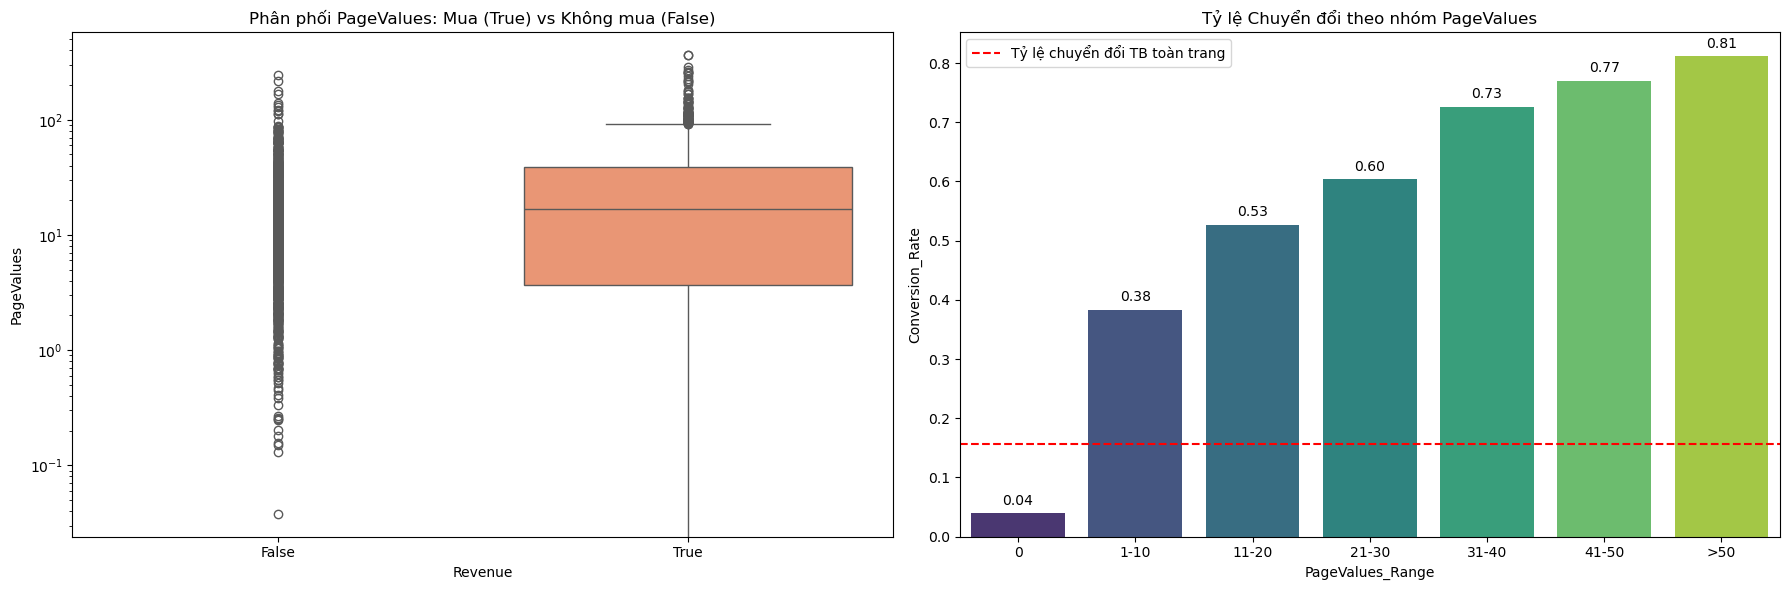

In [25]:
def categorize_pagevalues(x):
    if x == 0:
        return '0'
    elif x <= 10:
        return '1-10'
    elif x <= 20:
        return '11-20'
    elif x <= 30:
        return '21-30'
    elif x <= 40:
        return '31-40'
    elif x <= 50:
        return '41-50'
    else:
        return '>50' 

# Áp dụng hàm vào dữ liệu
data['PageValues_Range'] = data['PageValues'].apply(categorize_pagevalues)

# Tính toán tỷ lệ chuyển đổi cho từng nhóm
conversion_trend = data.groupby('PageValues_Range')['Revenue'].mean().reset_index()
conversion_trend.columns = ['PageValues_Range', 'Conversion_Rate']

# Định nghĩa thứ tự xuất hiện trên biểu đồ
order_list = ['0', '1-10', '11-20', '21-30', '31-40', '41-50', '>50']
order_list = [x for x in order_list if x in conversion_trend['PageValues_Range'].values]

plt.figure(figsize=(18, 6))

# Biểu đồ 1: Boxplot phân phối PageValues
plt.subplot(1, 2, 1)
sns.boxplot(x='Revenue', y='PageValues', data=data, palette='Set2')
plt.title('Phân phối PageValues: Mua (True) vs Không mua (False)')
plt.yscale('log')

# Biểu đồ 2: Barplot tỷ lệ chuyển đổi
plt.subplot(1, 2, 2)
barplot = sns.barplot(x='PageValues_Range', y='Conversion_Rate', data=conversion_trend, 
                      palette='viridis', order=order_list)
plt.title('Tỷ lệ Chuyển đổi theo nhóm PageValues')
plt.axhline(y=data['Revenue'].mean(), color='r', linestyle='--', label='Tỷ lệ chuyển đổi TB toàn trang')
plt.legend()

# Thêm nhãn giá trị lên cột
for p in barplot.patches:
    if p.get_height() > 0: 
        barplot.annotate(format(p.get_height(), '.2f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 9),
                       textcoords = 'offset points')

plt.tight_layout()
plt.show()

**Nhận xét:**
**1. Đối với Biểu đồ hộp (Boxplot) - Phân phối PageValues**
> *Biểu đồ này so sánh sự phân tán dữ liệu giữa nhóm khách hàng Mua (True) và Không mua (False).*

* **Sự tách biệt rõ ràng:** Có sự chênh lệch vị trí rất lớn giữa hai hộp dữ liệu.
    * Hộp của nhóm **Revenue=False** nằm bẹt dí sát trục hoành (giá trị xấp xỉ 0). Điều này cho thấy đại đa số khách hàng không mua hàng đều có `PageValues` cực thấp hoặc bằng 0.
    * Ngược lại, hộp của nhóm **Revenue=True** nằm ở vị trí cao hơn hẳn và có độ trải rộng (spread) lớn.
* **Giá trị ngoại lai (Outliers):** Nhóm Mua hàng có nhiều điểm dữ liệu vươn lên rất cao (trên 100, thậm chí 300), cho thấy có những phiên truy cập cực kỳ chất lượng dẫn đến hành vi mua hàng.
* **Kết luận trực quan:** Chỉ cần nhìn vào vị trí của hai hộp, ta có thể thấy `PageValues` là một đặc trưng phân lớp rất mạnh.

**2. Đối với Biểu đồ cột (Barplot) - Xu hướng chuyển đổi**
> *Biểu đồ này thể hiện mối quan hệ giữa các khoảng giá trị PageValues và Tỷ lệ chuyển đổi.*

* **Xu hướng tăng trưởng tuyến tính:** Các cột tăng dần chiều cao từ trái sang phải, tạo thành hình bậc thang đi lên rất đều đặn. Điều này chứng tỏ mối tương quan dương mạnh mẽ: `PageValues` càng cao, khả năng khách hàng chốt đơn càng lớn.
* **Điểm gãy quan trọng:**
    * Tại cột đầu tiên (**0**): Tỷ lệ chuyển đổi rất thấp (dưới 4%).
    * Tại cột thứ hai (**0-10**): Tỷ lệ chuyển đổi nhảy vọt lên gần 40%. Đây là "bước nhảy" quan trọng nhất. Chỉ cần khách hàng tương tác với trang có giá trị, xác suất mua hàng của họ tăng gấp 10 lần.
* **Vùng bão hòa cao:** Từ khoảng giá trị **40 trở lên**, tỷ lệ chuyển đổi luôn duy trì ở mức rất cao (trên 70-80%).

___
### Phân tích 
**1. Trả lời câu hỏi nghiên cứu**
Dữ liệu khẳng định chắc chắn rằng **`PageValues` đóng vai trò quyết định then chốt** trong việc phân loại khách hàng. Đây là chỉ số "báo hiệu" mạnh trong bộ dữ liệu, với sự khác biệt rõ rệt về mặt thống kê giữa nhóm khách hàng mua và không mua. Mối quan hệ giữa `PageValues` và tỷ lệ chuyển đổi là mối quan hệ tỷ lệ thuận (tuyến tính) mạnh mẽ.

**2. Bằng chứng số liệu và Xu hướng**
* **Sự chênh lệch khổng lồ về giá trị trung bình:**
    * Nhóm Mua hàng (`Revenue=True`) có `PageValues` trung bình là **27.26**, cao gấp **~13.6 lần** so với nhóm Không mua (chỉ đạt **1.99**).
    * Tại phân vị thứ 75% (75th percentile), nhóm Không mua vẫn dậm chân ở mức **0**. Điều này chứng tỏ đại đa số người dùng rời đi mà không mua hàng đều chưa từng tiếp cận các trang có giá trị cao.

* **Xu hướng chuyển đổi tuyến tính:**
    * **Tại mức 0:** Tỷ lệ chuyển đổi cực thấp, chỉ **3.9%**.
    * **Bước nhảy vọt (0-10):** Chỉ cần `PageValues` nhích nhẹ lên khoảng **0-10**, tỷ lệ chuyển đổi lập tức tăng vọt lên **38.4%** (gấp gần 10 lần so với mức 0).
    * **Vùng bão hòa (>50):** Khi giá trị vượt qua 50, tỷ lệ chốt đơn ổn định ở mức rất cao (**> 80%**). Đỉnh điểm là nhóm `100+` với tỷ lệ lên tới **86.6%**.

#### 3. Ý nghĩa thực tiễn và Tác động
* **Xác định "Điểm gãy":** Ngưỡng quan trọng nhất để phân loại khách hàng không phải là các giá trị cao, mà chính là **ngưỡng > 0**. Việc chuyển đổi một khách hàng từ trạng thái "Không có giá trị" sang "Có giá trị thấp" mang lại hiệu quả biên lớn nhất (tăng xác suất mua từ 4% lên 38%).
* **Chiến lược Phân khúc:**
    * **Nhóm PageValues = 0:** Cần tối ưu hóa điều hướng (Navigation) để dẫn dắt họ vào các trang sản phẩm/khuyến mãi.
    * **Nhóm 0 < PageValues < 20:** Đây là nhóm "Khách hàng tiềm năng cao đang phân vân". Doanh nghiệp nên tập trung ngân sách `Retargeting` (quảng cáo bám đuổi) hoặc gửi mã giảm giá ngay lập tức cho nhóm này để thúc đẩy họ hoàn tất đơn hàng.

#### 4. Những phát hiện bất ngờ
* **Hiệu quả của các giá trị nhỏ:** Một phát hiện thú vị là ngay cả mức `PageValues` thấp (0-10) đã mang lại tỷ lệ mua hàng gần **40%**. Điều này cho thấy không cần khách hàng phải xem quá nhiều trang giá trị cao, chỉ cần họ bắt đầu tương tác với luồng mua hàng là cơ hội thành công đã rất lớn.
* **Sự thống trị của số 0:** Có tới **9,475** lượt truy cập (chiếm đa số) có `PageValues = 0`. Điều này phản ánh thực tế khắc nghiệt của phễu chuyển đổi: Rất nhiều người vào xem nhưng rất ít người thực sự chạm đến các trang đích quan trọng.

#### 5. Hạn chế của phân tích 
* **Rủi ro về Nhân quả ngược (Reverse Causality):** Cần lưu ý rằng `PageValues` được tính toán dựa trên việc giao dịch có thành công hay không. Do đó, chỉ số này phản ánh *kết quả* của hành vi mua hàng hơn là *nguyên nhân* độc lập dẫn dắt hành vi đó ngay từ đầu.
* **Kích thước mẫu nhỏ ở vùng cao:** Nhóm `PageValues > 100` chỉ có **82** quan sát. Tỷ lệ chuyển đổi 86.6% ở nhóm này tuy cao nhưng độ tin cậy thống kê có thể thấp hơn các nhóm khác do mẫu quá nhỏ.

<div style="
  margin: 28px 0 20px 0;
  padding: 14px 18px;
  border-left: 6px solid #2563eb;
  background-color: #eff6ff;
  border-radius: 6px;
  max-width: 90%;
">
  <h2 style="
    margin: 0;
    font-weight: 700;
    color: #1e3a8a;
  ">
    4. Cuộc chiến giữa "Săn mới" và "Giữ cũ": Nhóm khách hàng nào (`VisitorType`) thực sự mang lại hiệu quả chuyển đổi cao hơn?
  </h2>
</div>

**Cụ thể:**
* Có phải khách hàng quay lại (`Returning_Visitor`) luôn trung thành và dễ mua hàng hơn khách mới (`New_Visitor`) không?
* Hành vi của hai nhóm này khác nhau như thế nào về mức độ "kén chọn" (thể hiện qua `BounceRates`)?

### 2. Động lực và Lợi ích:
* **Động lực:** Trong Marketing, chi phí để kiếm một khách mới thường cao gấp 5 lần chi phí giữ chân khách cũ. Tuy nhiên, nếu dữ liệu chỉ ra rằng khách cũ vào nhiều nhưng không mua (chỉ xem giá so sánh), thì chiến lược tập trung quá nhiều vào họ có thể là sai lầm.
* **Lợi ích:**
    * **Phân bổ ngân sách:** Quyết định nên đổ tiền vào việc kiếm khách mới hay chăm khách cũ.
    * **Tối ưu trải nghiệm:** Khách mới cần sự tin tưởng, khách cũ cần sự tiện lợi. Hiểu ai mua nhiều hơn để thiết kế giao diện phù hợp.
* **Đối tượng quan tâm:** CMO (Giám đốc Marketing), Trưởng phòng CRM (Customer Relationship Management).
* **Giải quyết vấn đề:** Giúp doanh nghiệp định hướng nhóm khách hàng cần được quan tâm, tránh lãng phí nguồn lực.

#### A. Tiền xử lý:
* **Lọc dữ liệu:**
    * Cột `VisitorType` có 3 giá trị: `New_Visitor`, `Returning_Visitor` và `Other`.
    * Nhóm `Other` rất nhỏ và không rõ ràng, nên ta sẽ loại bỏ nhóm này để tập trung so sánh đối đầu trực tiếp giữa Khách mới và Khách cũ.
* **Tính toán chỉ số:**
    * Tính tỷ lệ chuyển đổi cho từng nhóm.
    * Tính trung bình BounceRates để xem nhóm nào "khó tính" hơn.

In [18]:
# 1. Lọc dữ liệu: Chỉ lấy New và Returning
df_visitors = data[data['VisitorType'].isin(['New_Visitor', 'Returning_Visitor'])].copy()

# 2. Tạo bảng thống kê tổng hợp
# Tính tổng số phiên, số đơn hàng và tỷ lệ chuyển đổi
visitor_stats = df_visitors.groupby('VisitorType').agg({
    'Revenue': ['count', 'sum', 'mean'],
    'BounceRates': 'mean'
}).reset_index()

# Đặt lại tên cột cho dễ hiểu
visitor_stats.columns = ['Loại Khách', 'Tổng Phiên', 'Số Đơn Hàng', 'Tỷ lệ Chuyển đổi', 'Tỷ lệ Thoát TB']
print("Bảng so sánh hiệu quả Khách mới vs Khách cũ:\n", visitor_stats)

Bảng so sánh hiệu quả Khách mới vs Khách cũ:
           Loại Khách  Tổng Phiên  Số Đơn Hàng  Tỷ lệ Chuyển đổi  \
0        New_Visitor        1693          422          0.249262   
1              Other           0            0               NaN   
2  Returning_Visitor       10431         1470          0.140926   

   Tỷ lệ Thoát TB  
0        0.005146  
1             NaN  
2        0.022762  


C:\Users\kimkh\AppData\Local\Temp\ipykernel_44604\1148633047.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  visitor_stats = df_visitors.groupby('VisitorType').agg({


**Nhận xét:**

**1. Về Quy mô**
* Nhóm `Returning_Visitor` chiếm số lượng áp đảo với **10,431 phiên**, gấp hơn **6 lần** so với nhóm `New_Visitor` (1,693 phiên).
* Điều này cho thấy website có khả năng giữ chân khách hàng (`Retention`) khá tốt, người dùng có thói quen quay lại trang.

**2. Về Hiệu quả:**
* Mặc dù ít hơn về số lượng, nhưng `New_Visitor` lại có **Tỷ lệ chuyển đổi (`Conversion Rate`)** cao vượt trội:
    * Khách mới: **~24.9%**.
    * Khách cũ: **~14.1%** (Thấp hơn gần một nửa so với khách mới).
* **Lý giải:** Khách mới thường truy cập thông qua các kênh quảng cáo hoặc tìm kiếm với nhu cầu mua sắm cụ thể và cấp thiết. Trong khi đó, khách cũ có thể quay lại chỉ để: kiểm tra trạng thái đơn hàng, đọc tin tức, hoặc so sánh giá mà không có ý định mua ngay.

**3. Về Mức độ tương tác:**
* Chỉ số **`Bounce Rate` (Tỷ lệ thoát)** củng cố thêm cho nhận định trên:
    * Khách mới có tỷ lệ thoát cực thấp (**~0.5%**), chứng tỏ họ rất tập trung tìm kiếm thông tin.
    * Khách cũ có tỷ lệ thoát cao hơn gấp 4 lần (**~2.3%**), cho thấy nhóm này chứa nhiều phiên truy cập "kém chất lượng" hơn (vào rồi ra ngay).

#### B. Phân tích:
* **Kiểm định `Chi-square` (Chi bình phương)**: Vì `VisitorType` và `Revenue` đều là biến phân loại (`Categorical`), ta không dùng `T-test` hay `Mann-Whitney` được. `Chi-square` là lựa chọn chuẩn xác để kiểm tra xem "Việc mua hàng có phụ thuộc vào loại khách hay không".
* **So sánh hành vi:** So sánh `BounceRates` để xem nhóm nào có xu hướng "tham quan" (window shopping) nhiều hơn.

In [19]:
# Tạo bảng chéo (Contingency Table)
contingency_table = pd.crosstab(df_visitors['VisitorType'], df_visitors['Revenue'])

# Thực hiện kiểm định
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Kết quả kiểm định Chi-square: Statistic={chi2:.2f}, p-value={p}")

if p < 0.05:
    print("=> Kết luận: Có mối liên hệ có ý nghĩa thống kê giữa Loại khách và Khả năng mua hàng.")
else:
    print("=> Kết luận: Không có sự khác biệt về hành vi mua giữa hai nhóm.")

Kết quả kiểm định Chi-square: Statistic=128.98, p-value=6.839790501401443e-30
=> Kết luận: Có mối liên hệ có ý nghĩa thống kê giữa Loại khách và Khả năng mua hàng.


**Nhận xét:**
1.  **P-value siêu nhỏ (~0):**
    * Giá trị nhỏ hơn rất nhiều so với ngưỡng ý nghĩa tiêu chuẩn ($\alpha = 0.05$).
    * **Quyết định:** Bác bỏ hoàn toàn giả thuyết $H_0$ (cho rằng Loại khách và Hành vi mua hàng độc lập với nhau).
    * **Kết luận:** Có mối quan hệ phụ thuộc cực kỳ mạnh mẽ và có ý nghĩa thống kê giữa việc khách hàng là "Người mới" hay "Người cũ" với quyết định mua hàng của họ.

2.  **Statistic lớn (128.98):**
    * Giá trị Chi-bình phương lớn cho thấy sự chênh lệch giữa **Tần suất quan sát được** và **Tần suất kỳ vọng** (Giả định nếu hai biến không liên quan) là rất lớn.
    * Cụ thể, số lượng khách mới mua hàng thực tế cao hơn nhiều so với kỳ vọng ngẫu nhiên, trong khi khách cũ mua hàng lại thấp hơn kỳ vọng.

> **Tóm lại:** Kết quả kiểm định này là bằng chứng khoa học vững chắc để khẳng định rằng `VisitorType` là một đặc trưng quan trọng không thể bỏ qua. Việc phân loại khách hàng thành New/Returning để áp dụng chiến lược Marketing riêng biệt là hoàn toàn có cơ sở dữ liệu.

#### C. Kết quả và Diễn giải:

C:\Users\kimkh\AppData\Local\Temp\ipykernel_44604\2949801602.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loại Khách', y='Tỷ lệ Chuyển đổi', data=visitor_stats, ax=ax[0], palette='viridis')
C:\Users\kimkh\AppData\Local\Temp\ipykernel_44604\2949801602.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loại Khách', y='Tỷ lệ Thoát TB', data=visitor_stats, ax=ax[1], palette='magma')


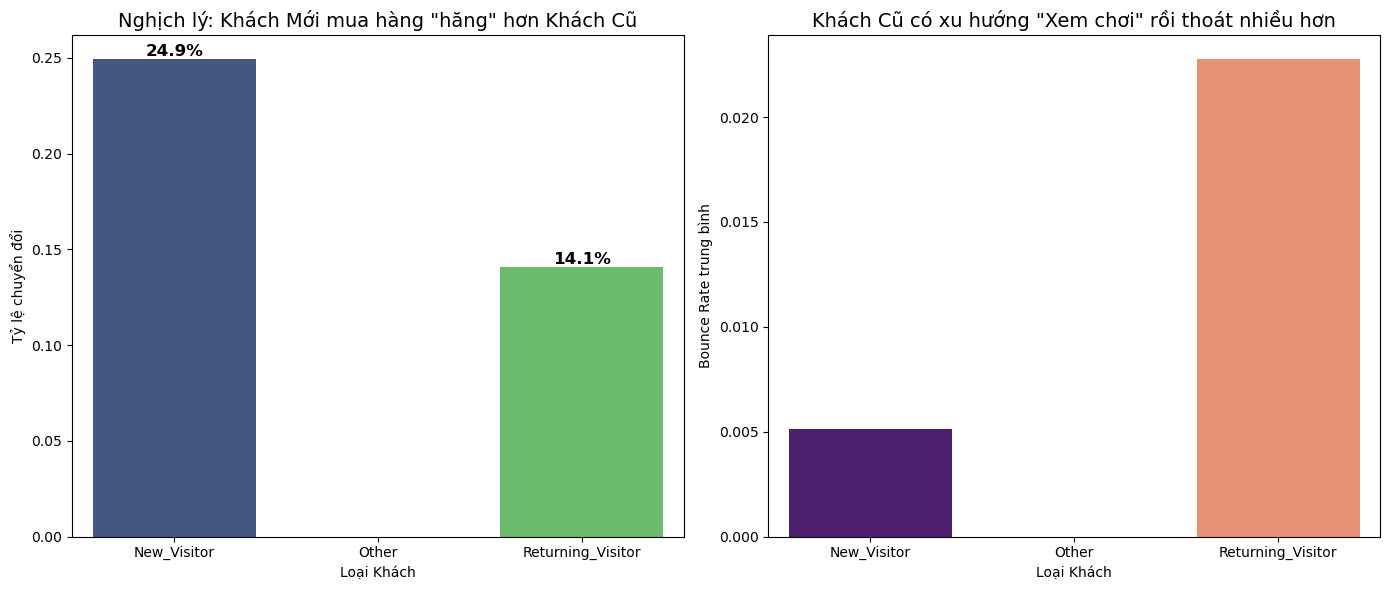

In [20]:
# Thiết lập biểu đồ
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ 1: Tỷ lệ Chuyển đổi (Conversion Rate)
sns.barplot(x='Loại Khách', y='Tỷ lệ Chuyển đổi', data=visitor_stats, ax=ax[0], palette='viridis')
ax[0].set_title('Nghịch lý: Khách Mới mua hàng "hăng" hơn Khách Cũ', fontsize=14)
ax[0].set_ylabel('Tỷ lệ chuyển đổi')

# Thêm nhãn giá trị lên cột
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height():.1%}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='bottom', fontsize=12, fontweight='bold')

# Biểu đồ 2: Tỷ lệ Thoát (Bounce Rate)
sns.barplot(x='Loại Khách', y='Tỷ lệ Thoát TB', data=visitor_stats, ax=ax[1], palette='magma')
ax[1].set_title('Khách Cũ có xu hướng "Xem chơi" rồi thoát nhiều hơn', fontsize=14)
ax[1].set_ylabel('Bounce Rate trung bình')

plt.tight_layout()
plt.show()

**Nhận xét:**
Quan sát hai biểu đồ cột so sánh giữa Khách mới (`New_Visitor`) và Khách cũ (`Returning_Visitor`), ta thấy sự tương phản rõ rệt về hiệu quả:

#### 1. Biểu đồ Tỷ lệ Chuyển đổi
* **Sự vượt trội của Khách mới:** Cột biểu thị `New_Visitor` vươn cao vượt trội, chạm mốc gần **25%**. Trong khi đó, cột `Returning_Visitor` thấp hơn đáng kể, chỉ đạt khoảng **14%**.
* **Ý nghĩa trực quan:** Nhìn vào độ chênh lệch chiều cao của hai cột, ta thấy ngay lập tức rằng nguồn khách hàng mới đang là "động cơ" chính tạo ra đơn hàng. Cứ mỗi khách mới bước vào, xác suất họ mua hàng cao gấp **1.7 lần** so với một khách cũ quay lại.

#### 2. Biểu đồ Tỷ lệ Thoát
* **Sự "thờ ơ" của Khách cũ:** Ở biểu đồ này, xu hướng đảo ngược hoàn toàn. Cột `Returning_Visitor` cao hơn rất nhiều so với `New_Visitor`.
* **Độ chênh lệch:** Tỷ lệ thoát của khách cũ (~2.3%) cao gấp **hơn 4 lần** so với khách mới (~0.5%).
* **Ý nghĩa trực quan:** Hình ảnh này phản ánh rằng nhóm khách cũ có rất nhiều phiên truy cập "rác" (vào trang rồi thoát ngay lập tức mà không tương tác thêm), trong khi khách mới thể hiện sự tập trung cao độ.

> **Tổng kết biểu đồ:** Hai hình ảnh này kể một câu chuyện nhất quán: **"Khách mới ít nhưng chất - Khách cũ đông nhưng loãng".**

<div style="
  margin: 28px 0 20px 0;
  padding: 14px 18px;
  border-left: 6px solid #2563eb;
  background-color: #eff6ff;
  border-radius: 6px;
  max-width: 90%;
">
  <h2 style="
    margin: 0;
    font-weight: 700;
    color: #1e3a8a;
  ">
    5. Làm thế nào để phân định các nhóm chân dung khách hàng (Customer Personas) dựa trên hành vi duyệt web nhằm cá nhân hóa chiến lược tiếp cận?
  </h2>
</div>

<div style="margin: 26px 0 18px 0;">
  <h3 style="
    margin: 0;
    font-weight: 700;
    padding-bottom: 6px;
    border-bottom: 3px solid #e5e7eb;
  ">
    I. Mục tiêu phân tích
  </h3>
</div>


Sử dụng thuật toán K-means Clustering để phân nhóm các phiên truy cập dựa trên các đặc trưng hành vi định lượng (Numerical Features) cốt lõi trong bộ dữ liệu Online Shoppers Purchasing Intention, bao gồm:

- Mức độ quan tâm sản phẩm

- Chất lượng tương tác 

- Giá trị định danh (`PageValues`)

<div style="
  margin: 18px 0 10px 0;
  padding-left: 12px;
  border-left: 3px solid #c7d2fe;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    Vì sao cần phân tích vấn đề này?
  </h4>
</div>


Các phân tích trước đó chủ yếu dựa trên thống kê mô tả và so sánh giữa các nhóm có sẵn. Tuy nhiên, hành vi khách hàng thường phức tạp và đa chiều hơn thế. Việc chỉ nhìn vào các giá trị trung bình có thể che giấu đi những nhóm khách hàng ngách quan trọng. Phân cụm là phương pháp cần thiết để khám phá các cấu trúc ẩn trong dữ liệu mà các phương pháp thống kê thông thường không nhìn thấy được.

<div style="
  margin: 18px 0 10px 0;
  padding-left: 12px;
  border-left: 3px solid #c7d2fe;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    Phân tích này mang lại insight gì?
  </h4>
</div>


Việc trả lời câu hỏi này giúp lượng hóa chân dung khách hàng. Thay vì dựa vào phỏng đoán hoặc cảm tính, chúng ta sẽ có cơ sở dữ liệu chính xác để:

- **Nhận diện các nhóm hành vi cụ thể**: Phân tích giúp phát hiện các nhóm khách hàng với đặc điểm riêng biệt mà các phương pháp thống kê thông thường không thấy được, ví dụ:

    - Nhóm "Xem lướt": Những người xem rất nhiều trang nhưng không có hành vi mua (cần tác động thêm về tâm lý hoặc ưu đãi giá).

    - Nhóm "Tiềm năng cao nhưng rớt đơn": Những người có chỉ số PageValues cao nhưng lại thoát trang sớm (cần rà soát lỗi kỹ thuật hoặc tối ưu quy trình thanh toán).

    - Nhóm "Vãng lai": Những truy cập kém chất lượng (cần loại trừ khỏi tệp đối tượng quảng cáo để tiết kiệm chi phí).

- **Tối ưu hóa chiến lược tiếp cận**: Cung cấp "bản đồ" để đội ngũ Marketing và Sales biết nên ưu tiên nguồn lực vào đâu, chuyển từ chiến lược đại trà sang chiến lược cá nhân hóa cho từng nhóm.

<div style="
  margin: 18px 0 10px 0;
  padding-left: 12px;
  border-left: 3px solid #c7d2fe;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    Ai cần quan tâm đến kết quả này?
  </h4>
</div>

* Người phụ trách marketing hoặc quản lý ngân sách, để quyết định nên tập trung chi tiêu vào tháng nào.
* Nhóm triển khai quảng cáo, nhằm điều chỉnh mục tiêu và cách chạy chiến dịch phù hợp với hành vi người dùng từng giai đoạn.
* Nhóm nội dung, để xây dựng thông điệp đúng với mức độ quan tâm và nhu cầu mua của người dùng.

<div style="
  margin: 18px 0 10px 0;
  padding-left: 12px;
  border-left: 3px solid #c7d2fe;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    Phân tích này hỗ trợ quyết định gì?
  </h4>
</div>

- Marketing Team: Để xây dựng các chiến dịch tiếp thị chính xác hơn.

- Product/UX Designers: Để tối ưu hóa trải nghiệm người dùng trên website cho từng nhóm hành vi cụ thể.

- Sales Managers: Để tập trung nguồn lực chăm sóc vào nhóm khách hàng có xác suất chuyển đổi cao nhất.

<div style="margin: 26px 0 18px 0;">
  <h3 style="
    margin: 0;
    font-weight: 700;
    padding-bottom: 6px;
    border-bottom: 3px solid #e5e7eb;
  ">
    II. Giải quyết câu hỏi
  </h3>
</div>


<div style="
  margin: 18px 0 10px 0;
  padding-left: 12px;
  border-left: 3px solid #c7d2fe;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    a. Tiền xử lý
  </h4>
</div>

Vì thuật toán K-means hoạt động dựa trên việc tính toán khoảng cách giữa các điểm dữ liệu, do đó nó rất nhạy cảm với sự chênh lệch về đơn vị đo lường, cần thực hiện một quy trình xử lý nghiêm ngặt để đảm bảo kết quả phân cụm chính xác và có ý nghĩa.

Quy trình tiền xử lý bao gồm hai bước chính:

**1. Lựa chọn đặc trưng**
Chúng ta sẽ trích xuất một tập hợp con các biến numerical phản ánh rõ nét nhất hành vi và giá trị của người dùng. Các biến được chọn bao gồm:

* **Nhóm thời lượng (`Administrative_Duration`, `Informational_Duration`, `ProductRelated_Duration`):** Đo lường mức độ tương tác và thời gian khách hàng bỏ ra cho từng loại nội dung. Đặc biệt, `ProductRelated_Duration` là chỉ báo quan trọng về sự quan tâm đến sản phẩm.
* **Nhóm chỉ số tiêu cực (`BounceRates`, `ExitRates`):** Phản ánh chất lượng của phiên truy cập. Giá trị cao cho thấy khách hàng rời đi nhanh chóng hoặc không tìm thấy nội dung hữu ích.
* **Nhóm giá trị (`PageValues`):** Đây là chỉ số quan trọng nhất để xác định khả năng chuyển đổi, đo lường giá trị trung bình của các trang mà người dùng đã ghé qua trước khi chốt đơn.

**Logic thực hiện:** Việc loại bỏ các biến không liên quan giúp giảm nhiễu (noise) và tập trung thuật toán vào việc tìm ra các mẫu hình hành vi thực sự.

**2. Chuẩn hóa dữ liệu**

Đây là bước bắt buộc đối với K-means. Chúng ta sẽ áp dụng kỹ thuật **Standardization** để đưa tất cả các biến về cùng một phân phối chuẩn (mean = 0, standard deviation = 1).

**Logic và Lý do:**

* **Vấn đề:** Các biến có đơn vị đo lường rất khác nhau. Ví dụ: `ProductRelated_Duration` có thể lên tới hàng nghìn (giây), trong khi `BounceRates` chỉ dao động từ 0 đến 0.2 (tỷ lệ).
* **Hậu quả nếu không xử lý:** Khi tính khoảng cách, thuật toán sẽ bị chi phối hoàn toàn bởi các biến có giá trị lớn và coi nhẹ các biến có giá trị nhỏ, dẫn đến kết quả phân cụm bị sai lệch.
* **Giải pháp:** Sau khi chuẩn hóa, các biến sẽ đóng góp trọng số ngang nhau vào việc hình thành các cụm, giúp việc phân nhóm công bằng và chính xác.

In [21]:
# Danh sách các cột định lượng quan trọng cho hành vi và giá trị
selected_features = [
    'Administrative_Duration', 
    'Informational_Duration', 
    'ProductRelated_Duration', 
    'BounceRates', 
    'ExitRates', 
    'PageValues'
]   

# Tạo DataFrame chỉ chứa các đặc trưng đã chọn để phục vụ phân cụm
# .copy() để đảm bảo không ảnh hưởng đến dữ liệu
clustering_data = data[selected_features].copy()

# Khởi tạo bộ chuẩn hóa (StandardScaler)
scaler = StandardScaler()

# Thực hiện chuẩn hóa
scaled_array = scaler.fit_transform(clustering_data)

# Chuyển đổi lại thành DataFrame để dễ quản lý và hiển thị
scaled_df = pd.DataFrame(scaled_array, columns=selected_features, index=clustering_data.index)

# Sau khi Standardize, trung bình (mean) xấp xỉ 0 và độ lệch chuẩn (std) xấp xỉ 1
print("Thống kê mô tả sau khi chuẩn hóa (Kiểm tra mean ~ 0, std ~ 1):")
print(scaled_df.describe().round(2))

Thống kê mô tả sau khi chuẩn hóa (Kiểm tra mean ~ 0, std ~ 1):
       Administrative_Duration  Informational_Duration  \
count                 12205.00                12205.00   
mean                     -0.00                   -0.00   
std                       1.00                    1.00   
min                      -0.46                   -0.25   
25%                      -0.46                   -0.25   
50%                      -0.41                   -0.25   
75%                       0.07                   -0.25   
max                      18.69                   17.78   

       ProductRelated_Duration  BounceRates  ExitRates  PageValues  
count                 12205.00     12205.00   12205.00    12205.00  
mean                      0.00         0.00       0.00        0.00  
std                       1.00         1.00       1.00        1.00  
min                      -0.63        -0.45      -0.90       -0.32  
25%                      -0.53        -0.45      -0.59       -0.32  


<div style="
  margin: 18px 0 10px 0;
  padding-left: 12px;
  border-left: 3px solid #c7d2fe;
">
  <h4 style="
    margin: 0;
    font-weight: 600;
  ">
    b. Phân tích
  </h4>
</div>

##### **Phương pháp tiếp cận**

Sau khi dữ liệu đã được làm sạch và chuẩn hóa, bước tiếp theo là xác định các nhóm chân dung khách hàng ẩn trong tập dữ liệu. Chiến lược phân tích tuân theo trình tự logic: Xác định số nhóm tối ưu, Tiến hành phân nhóm định danh khách hàng, Trực quan hóa kết quả.

##### **Phương pháp và Lý do lựa chọn**

Các kỹ thuật sau được kết hợp để giải quyết bài toán:

**1. Phương pháp Khuỷu tay (Elbow Method)**

* **Mục đích:** Xác định số lượng nhóm hợp lý nhất cho dữ liệu.
* **Cách làm:** Thuật toán được chạy thử nghiệm với số nhóm chia từ 1 đến 10. Tại mỗi bước, độ nén của các nhóm được đo lường thông qua chỉ số Inertia.
* **Lý do:** Việc phân chia nhóm cần dựa trên cơ sở định lượng thay vì cảm tính. Phương pháp này giúp tìm ra điểm tối ưu – nơi mà việc chia thêm nhóm nhỏ hơn không còn mang lại hiệu quả rõ rệt, giúp tránh tình trạng chia nhóm quá nhỏ hoặc quá sơ sài.

**2. Thuật toán K-means Clustering**

* **Mục đích:** Thực hiện gom các phiên truy cập vào các nhóm đã xác định ở bước trên.
* **Lý do:** Đây là thuật toán hiệu quả và phổ biến để phân khúc khách hàng dựa trên dữ liệu số. Thuật toán hoạt động bằng cách nhóm các người dùng có khoảng cách hành vi gần nhau nhất về cùng một cụm, tạo ra các nhóm có đặc tính thống nhất.

**3. Phân tích trọng tâm cụm (Cluster Profiling)**

* **Mục đích:** Phân tích đặc điểm và đặt tên thương mại cho từng nhóm.
* **Cách làm:** Các giá trị trung bình của từng chỉ số (như PageValues, Duration) trong mỗi nhóm sẽ được tính toán để làm rõ hành vi thực tế.
* **Lý do:** Đây là bước then chốt để chuyển đổi kết quả kỹ thuật từ các con số khô khan thành thông tin kinh doanh có giá trị thực tiễn và dễ hiểu.

**4. Giảm chiều dữ liệu (PCA)**

* **Mục đích:** Trực quan hóa kết quả phân nhóm trên mặt phẳng 2D.
* **Lý do:** Dữ liệu hành vi ban đầu nằm trong không gian 6 chiều (tương ứng 6 thuộc tính), gây khó khăn cho việc quan sát trực tiếp. Kỹ thuật PCA giúp nén toàn bộ thông tin xuống không gian 2 chiều, cho phép quan sát rõ ràng ranh giới và mức độ tách biệt giữa các nhóm khách hàng.

##### **Kết quả đầu ra dự kiến**

1. **Biểu đồ Khuỷu tay:** Đường cong biểu diễn sự thay đổi của độ lỗi, dùng để chốt số lượng nhóm cần chia.
2. **Bảng chân dung khách hàng:** Bảng số liệu tóm tắt hành vi đặc trưng của từng nhóm, dùng để gán nhãn nhận diện.
3. **Biểu đồ phân tán 2D:** Hình ảnh trực quan các điểm dữ liệu được tô màu theo nhóm, giúp kiểm tra mức độ tách biệt giữa các phân khúc khách hàng.

d:\miniconda3\envs\introds_project\Lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


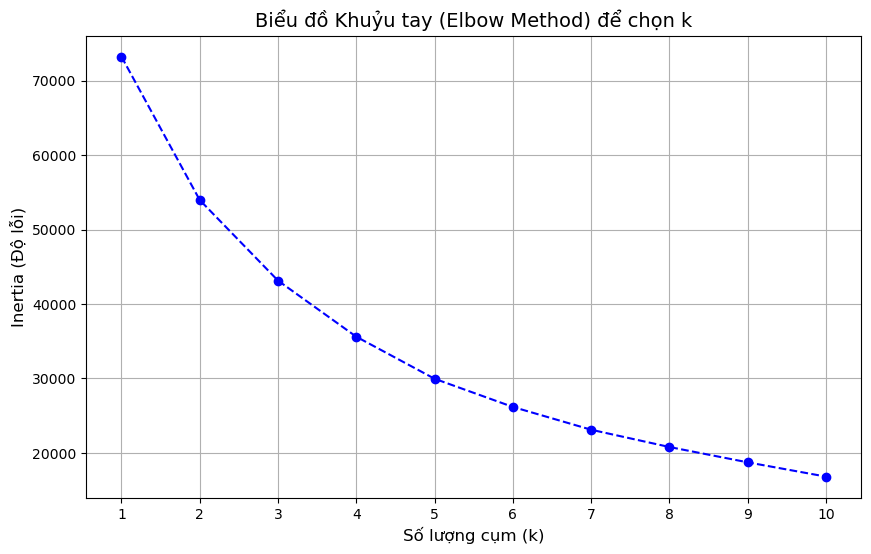

In [22]:
# Khởi tạo danh sách lưu giá trị Inertia (Tổng bình phương khoảng cách)
inertia = []
K_range = range(1, 11) # Thử nghiệm từ 1 đến 10 cụm

# Chạy vòng lặp để tính toán
for k in K_range:
    # random_state=42 giúp kết quả cố định qua các lần chạy
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_df) # Dùng dữ liệu ĐÃ chuẩn hóa
    inertia.append(kmeans.inertia_)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--', color='b')
plt.xlabel('Số lượng cụm (k)', fontsize=12)
plt.ylabel('Inertia (Độ lỗi)', fontsize=12)
plt.title('Biểu đồ Khuỷu tay (Elbow Method) để chọn k', fontsize=14)
plt.xticks(K_range)
plt.grid(True)
plt.show()

Lựa chọn số cụm tối ưu từ biểu đồ Khuỷu tay

Quan sát biến động của chỉ số trên biểu đồ, ta nhận thấy một xu hướng cấu trúc rất rõ ràng của dữ liệu. Trong giai đoạn đầu từ 1 đến 3 cụm, đường cong có độ dốc lớn, phản ánh việc chỉ số lỗi giảm mạnh. Điều này đồng nghĩa với việc chia tách dữ liệu trong giai đoạn này giúp độ nén và tính đồng nhất của các nhóm tăng lên đáng kể.

Tuy nhiên, ngay tại vị trí k bằng 3, đường cong xuất hiện một điểm uốn kỹ thuật rõ rệt, nơi tốc độ giảm lỗi bắt đầu bão hòa và đi ngang. Đây là tín hiệu cho thấy việc tiếp tục chia nhỏ thành 4 hay 5 nhóm sẽ không mang lại hiệu quả gia tăng tương xứng với độ phức tạp của mô hình. Do đó, con số 3 là điểm cân bằng lý tưởng, vừa đủ để phân tách các đặc tính hành vi cốt lõi, vừa đảm bảo tính tinh gọn để xây dựng chiến lược.

Bảng chân dung khách hàng (k=3):
         Administrative_Duration  Informational_Duration  \
Cluster                                                    
0                          57.01                   13.38   
1                           1.73                    0.10   
2                         434.39                  307.56   

         ProductRelated_Duration  BounceRates  ExitRates  PageValues  Count  \
Cluster                                                                       
0                         993.75         0.01       0.03        6.17  10357   
1                          63.00         0.16       0.18        0.00    917   
2                        4705.84         0.01       0.02        9.38    931   

         Percent  
Cluster           
0          84.86  
1           7.51  
2           7.63  


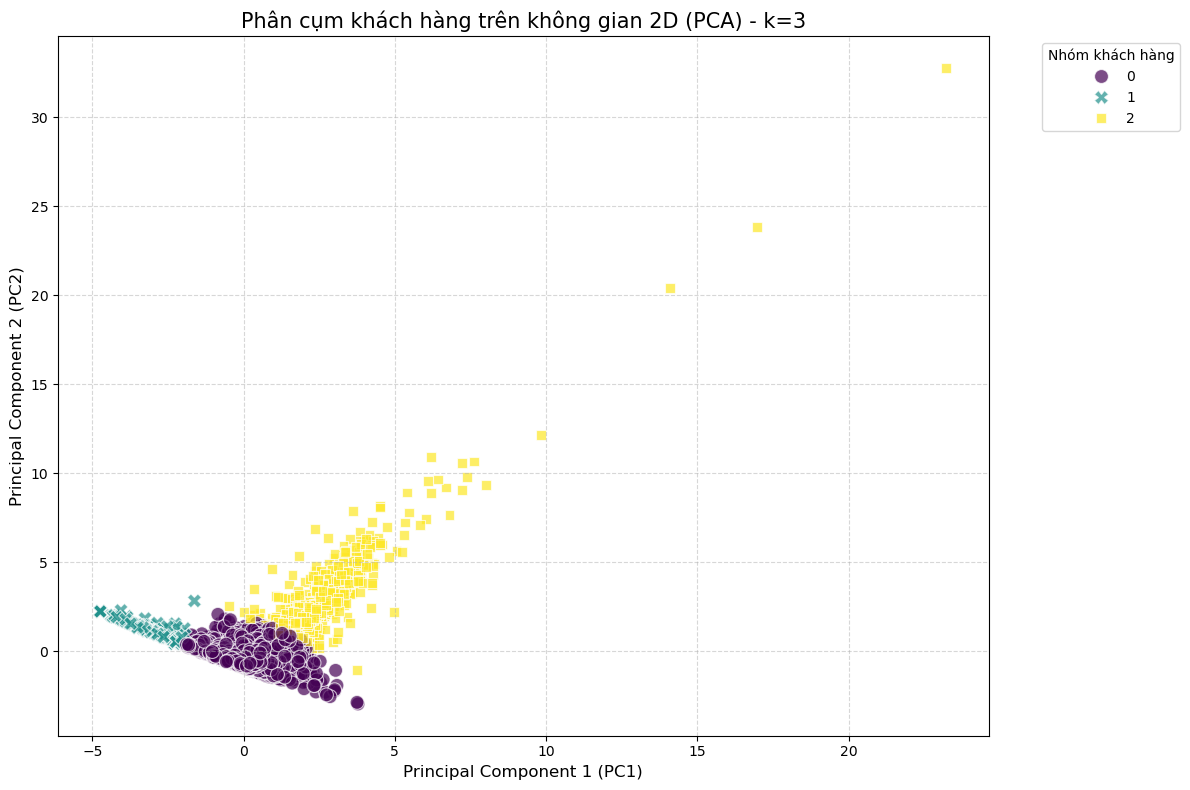

In [23]:
# Chọn k dựa trên biểu đồ Elbow
k_optimal = 3

# Chạy Kmeans với k đã chọn
kmeans = KMeans(n_clusters=k_optimal, random_state=100, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_df)

# Gán nhãn cụm vào dữ liệu gốc 
clustering_data['Cluster'] = cluster_labels

# Tính giá trị trung bình của các thuộc tính theo từng cụm
cluster_summary = clustering_data.groupby('Cluster').mean()

# Thêm cột số lượng khách hàng trong mỗi cụm
cluster_summary['Count'] = clustering_data['Cluster'].value_counts()
cluster_summary['Percent'] = (cluster_summary['Count'] / len(clustering_data)) * 100

print(f"Bảng chân dung khách hàng (k={k_optimal}):")
print(cluster_summary.round(2)) 

# Nén 6 chiều dữ liệu xuống 2 chiều để vẽ lên mặt phẳng
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df)

# Tạo DataFrame cho PCA để vẽ
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels

# Vẽ biểu đồ phân tán (Scatter Plot)
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=pca_df, 
    x='PC1', 
    y='PC2', 
    hue='Cluster', 
    palette='viridis', 
    s=100,     
    alpha=0.7,  
    style='Cluster' 
)

plt.title(f'Phân cụm khách hàng trên không gian 2D (PCA) - k={k_optimal}', fontsize=15)
plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('Principal Component 2 (PC2)', fontsize=12)
plt.legend(title='Nhóm khách hàng', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<div style="
  margin: 12px 0 16px 0;
  padding: 10px 14px;
  border-left: 3px solid #d1d5db;
  background-color: #f9fafb;
  border-radius: 6px;
">
  <strong>Đánh giá chất lượng phân cụm:</strong>
</div>

Hình ảnh trực quan hóa thông qua kỹ thuật giảm chiều dữ liệu PCA cung cấp bằng chứng thuyết phục về hiệu quả của mô hình K-means. Các điểm dữ liệu không phân bố hỗn loạn mà hình thành ba vùng tập trung riêng biệt, đại diện cho ba phân khúc khách hàng với đặc thù hành vi khác nhau:

* **Nhóm 0 (Màu Tím):** Vùng tập trung mật độ cao ở trung tâm biểu đồ phản ánh nhóm khách hàng phổ thông. Sự dày đặc này cho thấy đa số người dùng có hành vi tương đồng và ổn định, đóng vai trò là xương sống của lượng truy cập website.
* **Nhóm 1 (Màu Xanh lục):** Nhóm này co cụm rất gọn ở góc trái, biểu thị một mẫu hành vi có tính đồng nhất cao và chỉ số tương tác thấp. Đây đặc trưng cho những phiên truy cập ngắn, thường rời đi ngay lập tức mà không có nhiều biến động về thời gian.
* **Nhóm 2 (Màu Vàng):** Điểm đáng chú ý nhất là sự phân tán rộng và vươn xa về phía góc phải của nhóm này. Trong phân tích dữ liệu, sự vươn xa này đại diện cho các giá trị ngoại lai tích cực. Điều đó khẳng định sự tồn tại của một nhóm khách hàng vượt trội với thời gian tương tác sâu và giá trị trang cao hơn hẳn so với mặt bằng chung.

Sự tách biệt rõ ràng về mặt không gian này xác nhận rằng việc phân loại khách hàng dựa trên hành vi định lượng là hoàn toàn có cơ sở và phản ánh đúng thực tế trải nghiệm người dùng trên trang.

<div style="
  margin: 12px 0 16px 0;
  padding: 10px 14px;
  border-left: 3px solid #d1d5db;
  background-color: #f9fafb;
  border-radius: 6px;
">
  <strong>Phân tích và Định danh các nhóm :</strong>
</div>

- **Cluster 1: Nhóm Khách chất lượng thấp** 

    - **Đặc điểm nhận dạng**:

        - Chỉ số tiêu cực cao nhất: BounceRates (16%) và ExitRates (18%) cao vượt trội so với hai nhóm còn lại (chỉ 1-3%).

        - Thời gian tương tác gần như bằng 0: ProductRelated_Duration chỉ trung bình 63 giây, Administrative và Informational gần như bằng 0.

        - Giá trị bằng 0: PageValues = 0.00. Nhóm này hoàn toàn không thực hiện hành vi dẫn đến chuyển đổi.

    - **Tỷ trọng**: Chiếm khoảng 7.5% lượng truy cập.

    - **Insight**: Đây là nhóm traffic kém chất lượng, vào trang và thoát ra ngay lập tức mà không tìm thấy nội dung mong muốn hoặc do bấm nhầm.

- **Cluster 2: Nhóm Khách chất lượng cao**

    - **Đặc điểm nhận dạng**:

        - Thời gian lớn: ProductRelated_Duration lên tới 4705 giây (tương đương gần 80 phút), gấp gần 5 lần nhóm Cluster 0.

        - Tìm kiếm thông tin kỹ: Informational_Duration rất cao (307 giây), cho thấy họ đọc kỹ chính sách, bài viết hướng dẫn hoặc so sánh sản phẩm.

        - Giá trị cao nhất: PageValues đạt đỉnh 9.38, cho thấy họ thường xuyên ghé thăm các trang quan trọng.

    - **Tỷ trọng**: Chiếm khoảng 7.6% - đây là nhóm khách hàng ngách nhưng cực kỳ giá trị.

    - **Insight**: Đây là nhóm khách hàng khó tính hoặc đang cân nhắc mua các sản phẩm giá trị cao (High-involvement products). Họ cần nhiều thông tin để ra quyết định nhưng xác suất mua rất lớn.

- **Cluster 0: Nhóm Khách hàng Trung bình**

    - **Đặc điểm nhận dạng**:

        - Chiếm đa số áp đảo: 84.86% lượng truy cập nằm ở nhóm này.

        - Hành vi ổn định: ProductRelated_Duration khoảng 993 giây (~16 phút) - đủ lâu để xem hàng và chọn lựa.

        - Chất lượng tốt: BounceRates rất thấp (0.01) và PageValues khá cao (6.17).

    - **Insight**: Đây là tệp khách hàng phổ thông, xương sống tạo ra doanh thu cho website. Hành vi của họ là chuẩn mực của một người mua hàng thương mại điện tử thông thường.

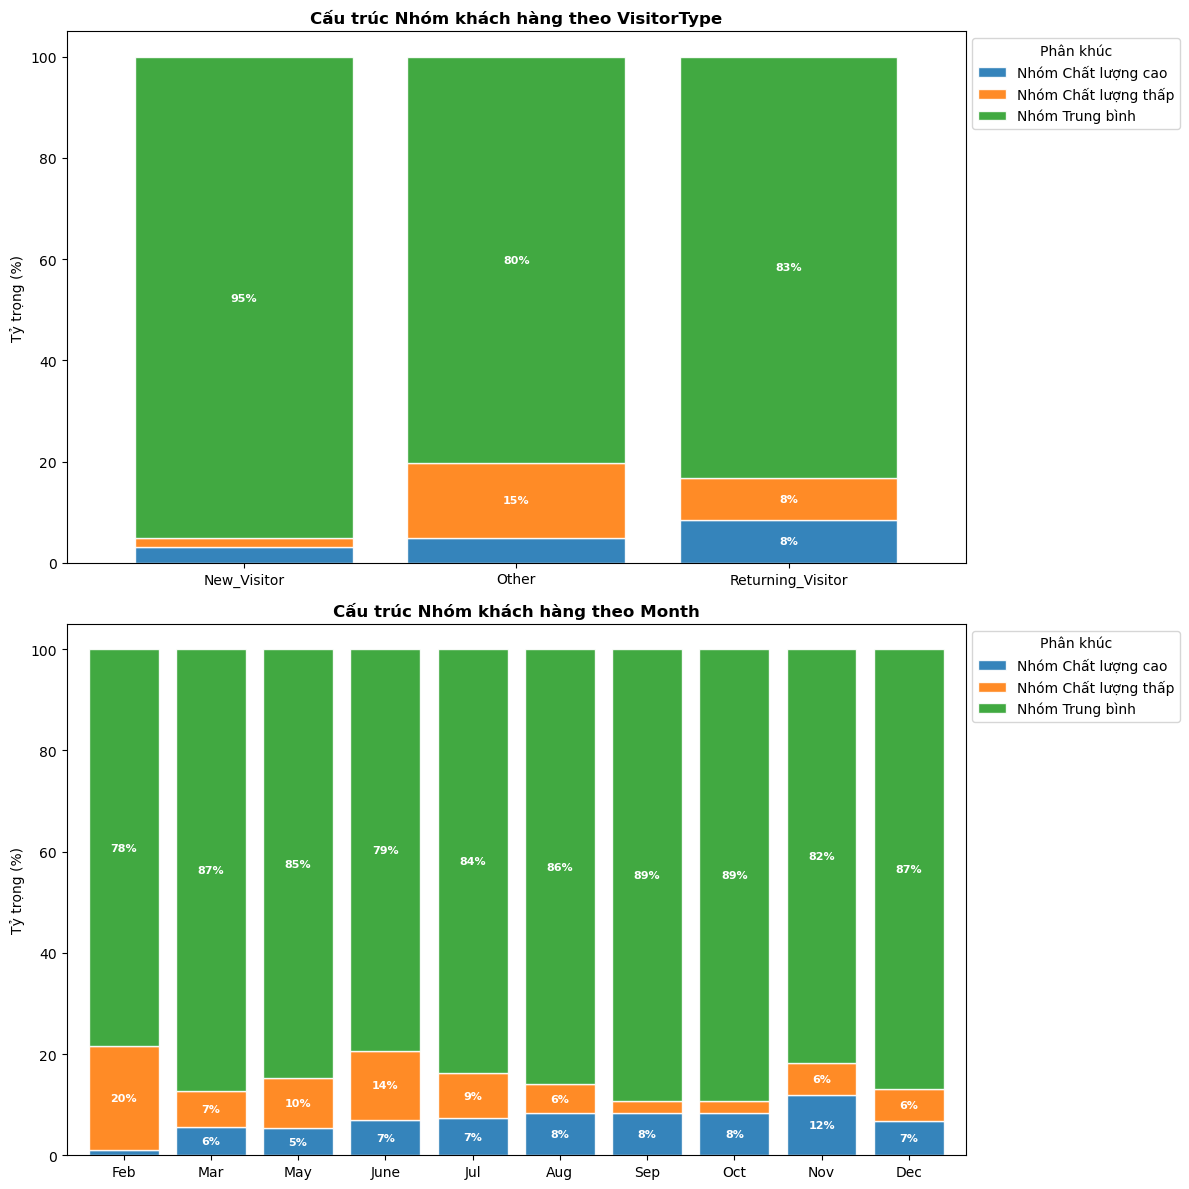

In [24]:
# Thêm các cột phân loại vào dữ liệu phân cụm để phân tích sâu hơn
cluster_mapping = {
        0: 'Nhóm Trung bình',
        1: 'Nhóm Chất lượng thấp',
        2: 'Nhóm Chất lượng cao'
    }
clustering_data['Cluster_Label'] = clustering_data['Cluster'].map(cluster_mapping)

cols_to_add = ['Month', 'VisitorType']
for col in cols_to_add:
        clustering_data[col] = data[col]

# Hàm vẽ biểu đồ 
def plot_feature_x_cluster_stack(feature, ax):
    cross_tab = pd.crosstab(clustering_data[feature], clustering_data['Cluster_Label'], normalize='index') * 100
    cross_tab.plot(kind='bar', stacked=True, ax=ax, width=0.8, edgecolor='white', alpha=0.9)
    
    ax.set_title(f'Cấu trúc Nhóm khách hàng theo {feature}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Tỷ trọng (%)')
    ax.set_xlabel('')
    
    ax.legend(title='Phân khúc', bbox_to_anchor=(1.0, 1), loc='upper left')
    ax.tick_params(axis='x', rotation=0)

    # Hiển thị số % lên biểu đồ
    for c in ax.containers:
        # Chỉ hiện số nếu thanh đó đủ lớn (>5%) để dễ đọc
        labels = [f'{v.get_height():.0f}%' if v.get_height() > 5 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='center', fontsize=8, color='white', fontweight='bold')


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Biểu đồ 1: Theo Loại khách (VisitorType)
plot_feature_x_cluster_stack('VisitorType', ax1)

# Biểu đồ 2: Theo Tháng (Month)
plot_feature_x_cluster_stack('Month', ax2)

plt.tight_layout()
plt.show()

<div style="
  margin: 12px 0 16px 0;
  padding: 10px 14px;
  border-left: 3px solid #d1d5db;
  background-color: #f9fafb;
  border-radius: 6px;
">
  <strong>Phân tích cấu trúc khách hàng theo đặc điểm định danh</strong>
</div>

Việc đối chiếu ba nhóm hành vi vừa xác lập với các biến số về loại khách hàng và thời gian đã làm sáng tỏ các giả thuyết được đặt ra ở giai đoạn đầu của nghiên cứu. Phương pháp này giúp chuyển hóa các dữ liệu thống kê thành những nhận định cụ thể về đặc điểm người dùng.

**a. Mối liên hệ với Loại khách hàng**

Số liệu phân bổ nhóm khách hàng theo từng đối tượng cho thấy sự khác biệt rõ rệt về hành vi giữa người dùng mới và người dùng quay lại:

* **Đối với Khách hàng mới:** Đây là nhóm có tính ổn định cao nhất. Khoảng 95% lượng khách mới thuộc nhóm Khách mua sắm tiêu chuẩn. Tỷ lệ này chỉ ra rằng khi lần đầu tiếp cận website, người dùng có xu hướng tuân theo luồng trải nghiệm mặc định, ít khi rời đi ngay lập tức nhưng cũng chưa sẵn sàng dành nhiều thời gian để nghiên cứu sâu.
* **Đối với Khách hàng quay lại:** Hành vi của nhóm này có sự phân hóa phức tạp hơn.
* Tỷ lệ nhóm Khách tìm hiểu sâu đạt mức 8%, cao hơn đáng kể so với khách mới. Điều này củng cố nhận định rằng sự gắn kết thường đi kèm với nhu cầu tìm hiểu kỹ lưỡng. Khách quay lại thường là những người đang cân nhắc thực hiện các giao dịch quan trọng.
* Tuy nhiên, tỷ lệ Khách vãng lai ở nhóm này cũng cao hơn so với khách mới. Nguyên nhân có thể xuất phát từ việc khách cũ quay lại chỉ để kiểm tra nhanh các thông tin như giá cả hoặc trạng thái đơn hàng rồi rời đi.



**Nhận định quản trị:** Chiến lược đối với khách mới nên tập trung vào việc duy trì trải nghiệm ổn định. Trong khi đó, với khách cũ, doanh nghiệp cần tối ưu nguồn lực để thúc đẩy chuyển đổi từ nhóm khách hàng có nhu cầu tìm hiểu sâu.

**b. Mối liên hệ với Yếu tố mùa vụ**

Biểu đồ cấu trúc khách hàng theo tháng cung cấp cơ sở để giải thích sự chênh lệch hiệu suất giữa các thời điểm trong năm.

* **Các tháng hiệu suất thấp:** Tháng 2 và tháng 6 ghi nhận tỷ lệ khách vãng lai tăng cao, chiếm lần lượt 20% và 14% tổng lượng truy cập. Đây là yếu tố chính ảnh hưởng đến hiệu quả doanh thu dù lượng truy cập vẫn duy trì ở mức nhất định. Một tỷ lệ lớn người dùng trong giai đoạn này rời đi ngay lập tức mà không thực hiện hành vi có giá trị.
* **Tháng cao điểm hiệu quả:** Tháng 11 sở hữu cấu trúc khách hàng tối ưu nhất trong năm. Tỷ lệ khách vãng lai giảm xuống mức thấp nhất là 6%, trong khi tỷ lệ nhóm Khách tìm hiểu sâu tăng lên mức 12%. Số liệu này chứng minh rằng hiệu quả của tháng 11 đến từ tâm lý mua sắm tích cực và hành vi nghiên cứu kỹ lưỡng của người dùng trong mùa lễ hội, thay vì chỉ dựa vào số lượng truy cập thuần túy.

<div style="
  margin: 28px 0 14px 0;
  padding: 12px 16px;
  border: 1px dashed #c7d2fe;
  border-radius: 14px;
  background-color: #fbfdff;
  max-width: 98%;
  box-sizing: border-box;
">
  <div style="
    font-size: 1.15em;
    font-weight: 700;
    color: #1e3a8a;
    text-align: center;
  ">
    NHẬN XÉT TỔNG KẾT
  </div>
</div>


<div style="
  margin: 16px 0 32px 0;
  padding: 16px 20px;
  border: 1px solid #dbeafe;
  border-radius: 12px;
  background-color: #f8fbff;
  max-width: 98%;
  box-sizing: border-box;
">

**1. Nhận xét**

Việc áp dụng thuật toán phân cụm K-means đã cung cấp góc nhìn chi tiết hơn so với các phương pháp thống kê mô tả thông thường:

1. **Nhận diện phân khúc tiềm năng:** Phương pháp này giúp phát hiện nhóm Khách tìm hiểu sâu. Dù chỉ chiếm tỷ trọng nhỏ khoảng 7.6%, đây là nhóm có cường độ tương tác cao và đóng vai trò quan trọng trong việc tạo ra chuyển đổi. Các chỉ số trung bình cộng thường không phản ánh được sự tồn tại của nhóm này.
2. **Làm rõ bản chất biến động theo mùa:** Kết quả phân tích khẳng định hiệu suất của tháng 11 xuất phát từ sự dịch chuyển tích cực trong hành vi người dùng, từ trạng thái xem lướt sang trạng thái nghiên cứu thông tin.
3. **Đề xuất hướng hành động:**
* Cần kiểm soát và đánh giá lại chất lượng nguồn traffic trong các tháng thấp điểm như tháng 2 để giảm thiểu tỷ lệ thoát trang, qua đó tối ưu hóa chi phí vận hành.
* Tập trung nâng cao chất lượng nội dung tại các trang chi tiết sản phẩm nhằm đáp ứng nhu cầu của nhóm Khách tìm hiểu sâu, coi đây là yếu tố then chốt để cải thiện tỷ lệ chuyển đổi.

Mô hình phân cụm này có thể được tích hợp vào hệ thống báo cáo định kỳ để giám sát sự thay đổi trong thị hiếu và hành vi khách hàng theo thời gian.
  
**2. Hạn chế của phân tích**

Phân tích vẫn còn một số giới hạn cần được cân nhắc khi đưa ra kết luận.

* **Phân tích theo phiên truy cập thay vì người dùng:** Mô hình hiện tại phân loại dữ liệu dựa trên từng phiên truy cập độc lập. Do đó, nghiên cứu chưa theo dõi được hành trình trọn vẹn của một khách hàng qua thời gian. Một người dùng có thể thuộc Nhóm chất lượng thấp trong lần đầu ghé thăm nhưng lại chuyển sang Nhóm chất lượng cao ở những lần quay lại sau.
* **Nhiễu dữ liệu về thời gian thực:** Nhóm chất lượng cao được xác định chủ yếu dựa trên chỉ số thời gian xem trang dài. Tuy nhiên, thuật toán không thể phân biệt chính xác giữa người dùng đang thực sự nghiên cứu nội dung và người dùng mở trình duyệt nhưng không hoạt động (treo máy), dẫn đến khả năng phân loại chưa hoàn toàn chính xác trong một số trường hợp.
* **Giả định về hình học của thuật toán:** K-means hoạt động tối ưu nhất khi các cụm dữ liệu có hình dạng tròn đều và mật độ tương đương. Trong thực tế, hành vi người dùng thường phân bố phức tạp, nên việc gom toàn bộ dữ liệu vào ba nhóm cố định là Nhóm chất lượng thấp, Nhóm trung bình và Nhóm chất lượng cao có thể chưa phản ánh hết các biến thể hành vi ngách.
</div>
